# FinanceHub Product EDA (2023)

> # Summary
>Summarized below are the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for FinanceHub in 2023 is 99415.5690 dollars. It is profitable, with total net profit at 9388.1586 dollars. Total monthly profit margin is  9.44 %.
>* Revenue growth has largely been positive, though fluctuation is quite significant. Only in April was growth negative, at -0.0090%. By December the CMGR is around 20.4% growth. Average CMGR is around 25%. 
>* On average, FinanceHub have around 55 users each month, with 19 being active. There is a 78% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Retention rates of cohorts falls around 20-50% during its monthly lifetime.
>* Generally NDR rates are below 100%, though March and July are exceptions as its NDR rates would reach 300% during their best month. However, the high NDR rates are few and one-off in the cohort's lifetime.
>* On a per-user basis, June and July cohort stands out in both revenue and profit. Both cohorts reached a cumulative revenue of ~1600 per user and ~250 profit per user in December.
>* Though there are some negative values per user in the initial month, CLV for FinanceHub is mostly positive. However, most cohort never exceed 100 dollars in CLV during its lifetime.
>
>Profitability
>* Pre-discounts, FinanceHub consistently had positive profits, with very few negative values (almost non-existant). This is an excellent indicator of the product's profitability and demand.
>* Highest positive profits can be seen in the months of September, November, and December (at 4615.14, 2790.24, and 4407.88 pre-discount, respectively).
>* Low profits pre-discounts can be seen in January and April. January starts the year with a modest positive profit of 403.60, while April shows a lower positive profit of 488.60 compared to other months. Both these months suggest lower sales volumes during this period.
>
>Discounting EDA
>* There are 304 orders for FinanceHub in 2023, 184 of which were applied discounts (60.5%). This high percentage (60.5%) indicates the importance of discount strategies in driving sales.
>* September and December are FinanceHub's peak periods. Assuming full price sales, September has had the highest potential profit at 4615.14. With discounting, this is reduced to 2612.19 (a significant reduction). Despite this, the actual profit remained high at 2248.00. December remains the most profitable month with an overall profit of 2398.06.
>* August saw the highest increase in negative profit after discounts, from 0 to 633.01. This suggests heavy discounting led to higher negative profits. However, August still maintained an overall positive profit of 382.31.
>* January had the lowest potential profit before discounts (403.60) and an overall negative profit of -88.08 after discounts, typical in SaaS businesses due to initial costs and promotional offers at the start of the year.
>* Discounts for FinanceHub's orders are between 10-30%, with no excessive discounting above 30%. High number of orders with no discounts, especially in December (23) and September (12), indicate strong demand and willingness to pay full price.
>* Within the 30% discount range there is significant reductions in net profits, requiring careful consideration. 20% discount range is consistent in profit, while lower ranges (0-10%) is more inconsistent but has the highest maximum value.
>* Overall, most months maintain overall positive profits even after discounts, with only January showing a negative profit. This demonstrates the resilience of FinanceHub as a product. 
>
>Ideal Customer Profile (ICP)
>* SMB and Strategic segments are the top performers for the FinanceHub product. SMB leads with 53.51% of Total Accounts, 52.68% of Net Revenue, and a Net Profit of 4380.50. The Strategic segment follows, with 26.94% of Total Accounts, 30.52% of Net Revenue, and a Net Profit of 3883.91. The Enterprise segment, though smaller, remains profitable with a Net Profit of 1,123.75. Abandoning Enterprise could mean lost opportunities. A balanced strategy focusing on SMBs and Strategic segments while maintaining Enterprise is the best approach.
>* In the SMB segment, the Retail industry in all regions are best performing; along with Healthcare in AMER and Finance in EMEA. Meanwhile, Manufacturing in EMEA, Healthcare in APJ, and Energy in APJ lose money and are high-risk. Significant shares but minimal contribution from these industries suggest revising discount strategies. Balancing revenue and profitability requires smart measures and considering operational costs and marketing efforts.
>* In the Strategic segment, Finance in EMEA and APJ; along with Healthcare in AMER and Energy in APJ excel. However, Energy in AMER and Manufacturing in EMEA suffer severe losses. Rethinking discount strategies is crucial for balancing revenue and profitability.
>* In the Enterprise segment, focus on Finance in AMER, Healthcare in EMEA, Energy in APJ, and Transportation in EMEA for strategic growth. Address significant losses in Manufacturing in APJ, Communications in EMEA, Healthcare in AMER. Heavy discounting is the problem. Revise discount strategies to balance revenue and profitability effectively. Measure all costs to ensure overall profitability.
>* EMEA has the highest sales and net profit, especially in September and December, but needs better discount management to avoid negative profits and stabilize sales. Discounts result in negative profits in January, February, May, and August.
>* AMER has strong sales and profits in September and December, with dips in March and April. Discounts often lead to negative profits, especially in April and November.
>* APJ has the lowest sales and net profit among the regions, with peaks in March, June, and November. Discounts severely impact profits, especially in January, February, May, July, September, October, and December.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [5]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [6]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [7]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [8]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [9]:
#slice main df by product first
prod2 = df.query("Product == 'FinanceHub'")
# then slice product df by year of analysis
prod2_2023=prod2.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod2_2023['reg_date'] = prod2_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_5196\3093201693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod2_2023['reg_date'] = prod2_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod2_2023_user = prod2_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod2_2023_user['reg_month']= prod2_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod2_2023_user['key'] = 1
prod2_2023_user = template_table.merge(prod2_2023_user,on='key')
prod2_2023_user =prod2_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod2_2023_user = prod2_2023_user[prod2_2023_user['Month']>=prod2_2023_user['reg_month']]

In [12]:
prod2_2023['Month'] = prod2_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod2_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod2_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod2_2023_user = prod2_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod2_2023_user = prod2_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_5196\3405632506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod2_2023['Month'] = prod2_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod2_2023_user['user'] = 1    
prod2_2023_user['new user'] = (prod2_2023_user['reg_month'] == prod2_2023_user['Month']) * 1 
prod2_2023_user['active'] = (prod2_2023_user['Sales'] > 0) * 1   
prod2_2023_user['active_prev'] = (prod2_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod2_2023_user['change_status'] = (prod2_2023_user['active'] != prod2_2023_user['active_prev']) * 1
prod2_2023_user['session_id'] = (prod2_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod2_2023_user['inactive'] = (prod2_2023_user['active'] == 0) * 1
prod2_2023_user['month_inactive'] = (prod2_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#FinanceHub monthly user report (2023)
prod2_2023_report = prod2_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod2_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,27.0000,9.0000,2271.1910,1779.5139,403.5950,-88.0821,8,8,8
2023-02-01,21.0000,7.0000,3582.6520,2722.2268,1029.1816,168.7564,13,5,6
2023-03-01,63.0000,18.0000,5749.0140,5394.1110,1479.6572,1124.7542,26,13,15
2023-04-01,64.0000,13.0000,2270.5800,1989.2802,488.6015,207.3017,33,7,12
2023-05-01,110.0000,26.0000,9545.9490,8007.9227,2035.1320,497.1057,50,17,24
2023-06-01,73.0000,18.0000,8105.9520,7046.2208,2130.6530,1070.9218,55,5,16
2023-07-01,89.0000,22.0000,5522.7700,4657.7092,1360.7608,495.7000,65,10,20
2023-08-01,85.0000,18.0000,9248.3700,7588.6358,2042.0369,382.3027,72,7,18
2023-09-01,178.0000,40.0000,18021.8230,15660.7435,4609.0799,2248.0004,78,6,32


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [27]:
prod2_2023_churn = prod2_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod2_2023_churn['old active'] = (prod2_2023_churn['active'] - prod2_2023_churn['new user'])
prod2_2023_churn['user churn'] = ((1 - (prod2_2023_churn['old active'] / prod2_2023_churn['user'].shift(1))) * 100).round()
prod2_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,2271.1910,-88.0821,8,8,8,0,NaN
2023-02-01,3582.6520,168.7564,13,5,6,1,88.0000
2023-03-01,5749.0140,1124.7542,26,13,15,2,85.0000
2023-04-01,2270.5800,207.3017,33,7,12,5,81.0000
2023-05-01,9545.9490,497.1057,50,17,24,7,79.0000
2023-06-01,8105.9520,1070.9218,55,5,16,11,78.0000
2023-07-01,5522.7700,495.7000,65,10,20,10,82.0000
2023-08-01,9248.3700,382.3027,72,7,18,11,83.0000
2023-09-01,18021.8230,2248.0004,78,6,32,26,64.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [28]:
#monthly avg. user churn
prod2_2023_churn[["user", "active", "user churn"]].mean()

user         55.0833
active       19.1667
user churn   78.0909
dtype: float64

In [29]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod2_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 2271.1910, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

sales_report

,month,Sales,net_profit,CMGR
0,1,2271.1910,-88.0821,0.0000
1,2,3582.6520,168.7564,57.7433
2,3,5749.0140,1124.7542,59.0999
3,4,2270.5800,207.3017,-0.0090
4,5,9545.9490,497.1057,43.1830
5,6,8105.9520,1070.9218,28.9763
6,7,5522.7700,495.7000,15.9624
7,8,9248.3700,382.3027,22.2126
8,9,18021.8230,2248.0004,29.5517
9,10,5082.9480,83.9331,9.3638


In [18]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

0.565604643172751

In [19]:
# The CMGR is very close to being normally distributed
sales_report['CMGR'].mean()

25.422313444034128

In [20]:
prod2_2023[['Sales', 'net_profit']].sum()

Sales        99415.5690
net_profit    9388.1586
dtype: float64

In [21]:
# Total monthly profit margin
(9388.1586/ 99415.5690) * 100


9.443348455813798

In [30]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.8792
net_profit,0.8792,1.0000


**Key findings:**
1. On average, FinanceHub have around 55 users each month, with 19 being active. There is a 78% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year starting from September, but number of new users decrease (only 2 new user in December).
2. Throughout 2023, revenue growth has largely been positive, though fluctuation is quite significant. Only in April was growth negative, at -0.0090%. By December the CMGR is around 20.4% growth. On average, CMGR is around 25%.
3. Total revenue for FinanceHub in 2023 is 99415.5690 dollars. It is profitable, with total net profit at 9388.1586 dollars. This put FinanceHub's profit margin at 9.44 %.
4. Increase in monthly revenue does not equal an increase in monthly profit. Sales of February was lower than in October (3582.6520 compared to 5522.7700), yet it yielded higher profit (168.7564 compared to 83.9331).

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod2_2023_user['date']=prod2_2023_user['Month'].dt.to_period('M')
prod2_2023_user['cohort']= prod2_2023_user['reg_month'].dt.to_period('M')
prod2_2023_user['lifetime'] = (prod2_2023_user['date'] - prod2_2023_user['cohort']).apply(attrgetter('n'))

In [23]:
prod2_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1007,AmerisourceBergen,2023-01-20,2023-01-01,3.0000,887.2710,621.0897,202.8048,-63.3765,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1019,Cisco Systems,2023-01-02,2023-01-01,4.0000,310.7440,217.5208,66.5880,-26.6352,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod2_cohort = prod2_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod2_cohort ['active rate'] = (prod2_cohort['active'] / prod2_cohort['user']) * 100
prod2_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,8,8,8,100.0000
1,2023-01-01,1,8,0,1,12.5000
2,2023-01-01,2,8,0,2,25.0000
3,2023-01-01,3,8,0,2,25.0000
4,2023-01-01,4,8,0,0,0.0000
...,...,...,...,...,...,...
73,2023-10-01,1,7,0,2,28.5714
74,2023-10-01,2,7,0,1,14.2857
75,2023-11-01,0,2,2,2,100.0000
76,2023-11-01,1,2,0,1,50.0000


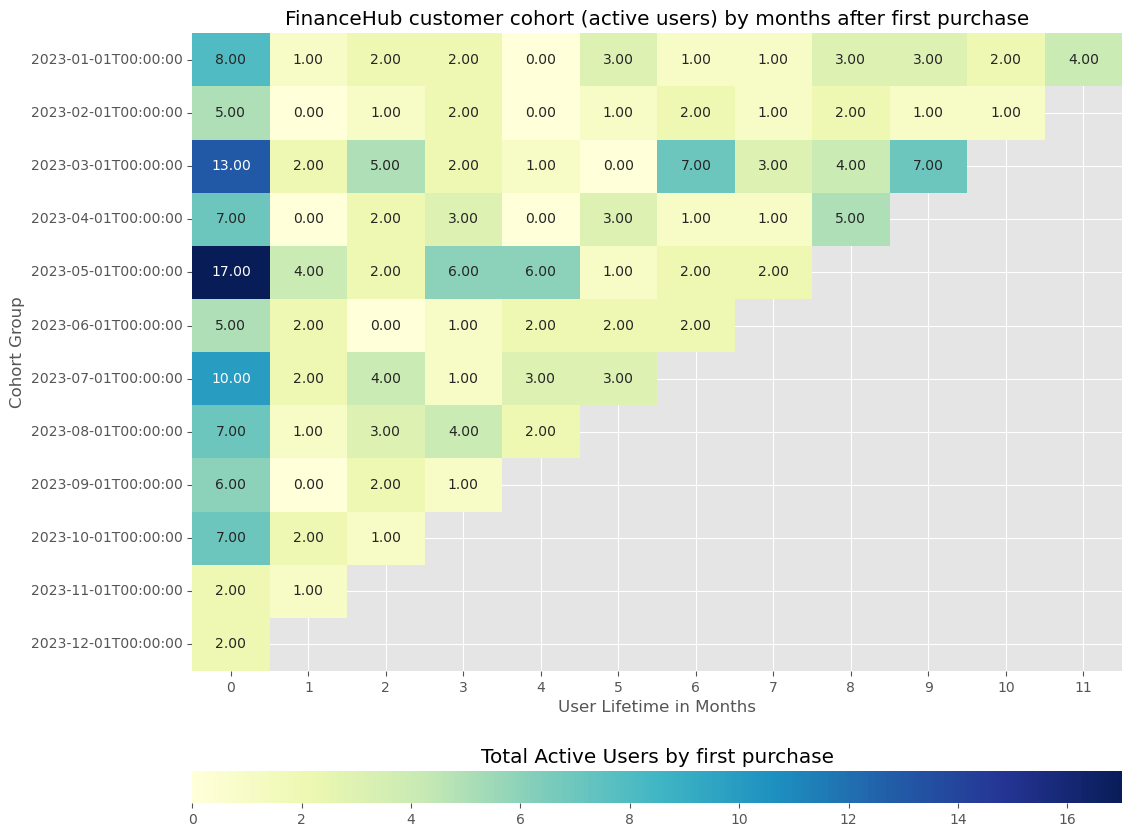

In [25]:
# customer cohort
pivot0 =prod2_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Relatively high number of users in the initial month can be observed in the March and May cohorts (13 and 17 users, respectively).
- There doesn't seem to be a significant pattern in active users for FinanceHub, except that for some cohort such as January, March, April, and July there seem to be an increased activity in periods around September until the end of the year. 

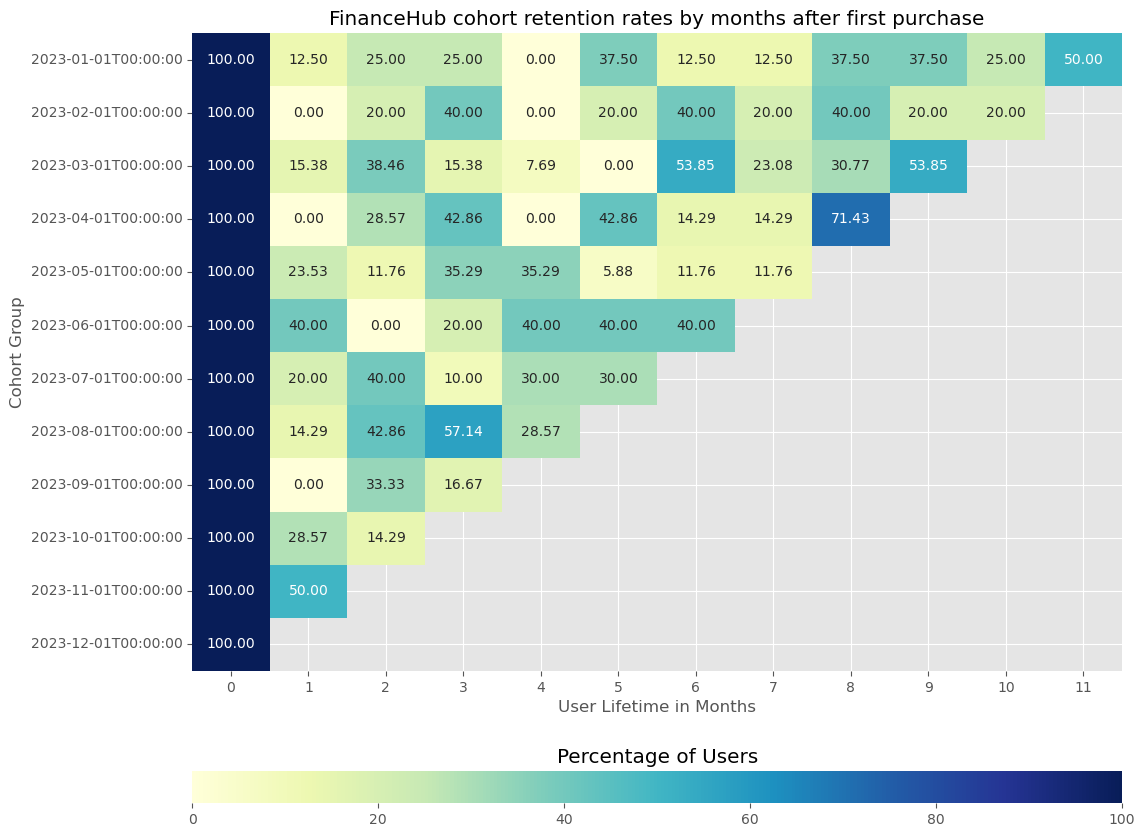

In [26]:
# customer retention
pivot1 =prod2_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- After their initial puchase, most cohort only have retention rates of around 20-50% during its monthly lifetime.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

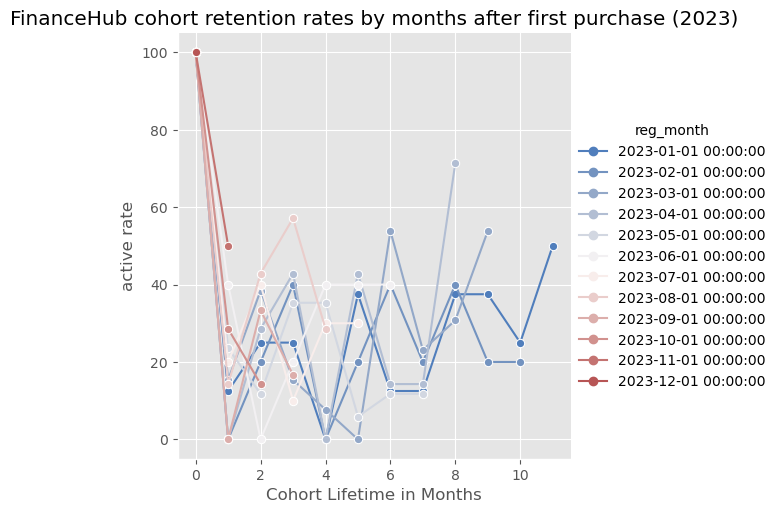

In [20]:
# retention rate lineplots
sns.relplot(data=prod2_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('FinanceHub cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [16]:
prod2_cohort2 =prod2_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

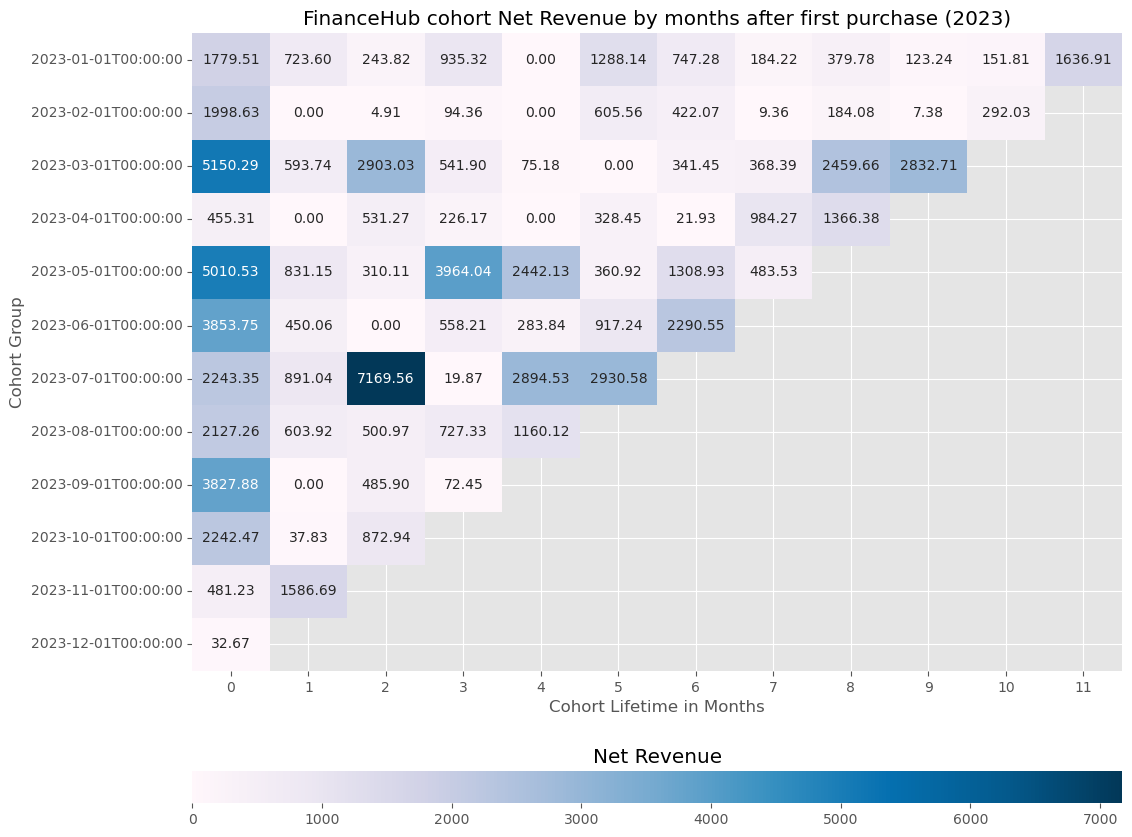

In [22]:
# Net Revenue by Cohort
pivot2 =prod2_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- Most cohorts have their highest purchase in their initial month at around ~2k-5k. 
- July cohort is the only exception where subsequent purchases significantly exceeds the initial purchase. In the initial month, the July cohort has a purchase of around 2k. By the third month of its lifetime (September), it made a purchase of around 7k.


In [17]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod2_2023_user.loc[prod2_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod2_cohort2 = prod2_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod2_cohort2 ['net dollar retention'] = (prod2_cohort2['discounted_sales'] / prod2_cohort2['ds_max']) * 100

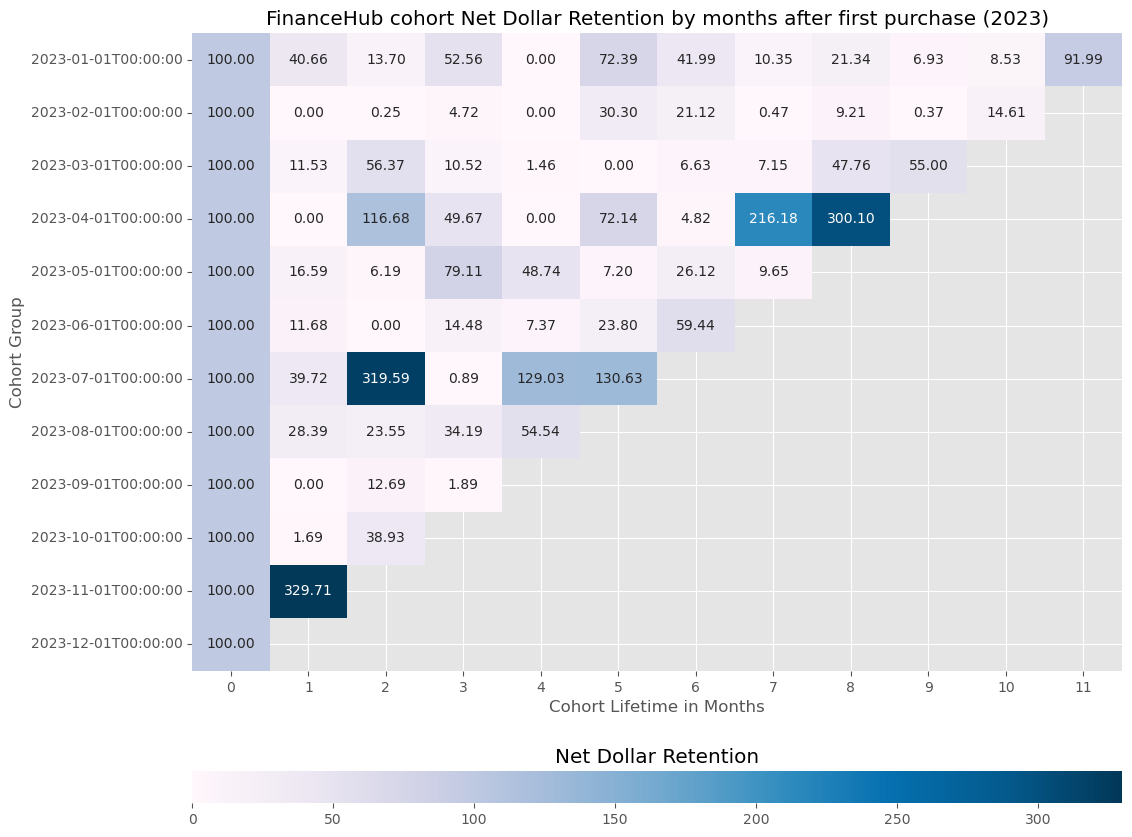

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod2_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- for FinanceHub, generally NDR rates are below 100%, with some rates below 1% in months for certain cohorts. Yet there are months where rates exceed 100% after initial purchase for some cohorts.
- March cohort have 3 months in their lifetime where NDR exceed 100%, in June, November and December. November and December NDR rates are quite significant as it reached 200% and 300%, respectively.
- July cohort have 3 months in their lifetime where NDR exceed 100%, in September, November and December. In September NDR rate is quite significant at around 300%.
- Though March and July have significant NDR during particular months in their lifetime, we can see that this number does not retain the majority of the cohort's lifetime.

In [18]:
prod2_cohort2 ['cumulative lifetime revenue'] = prod2_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

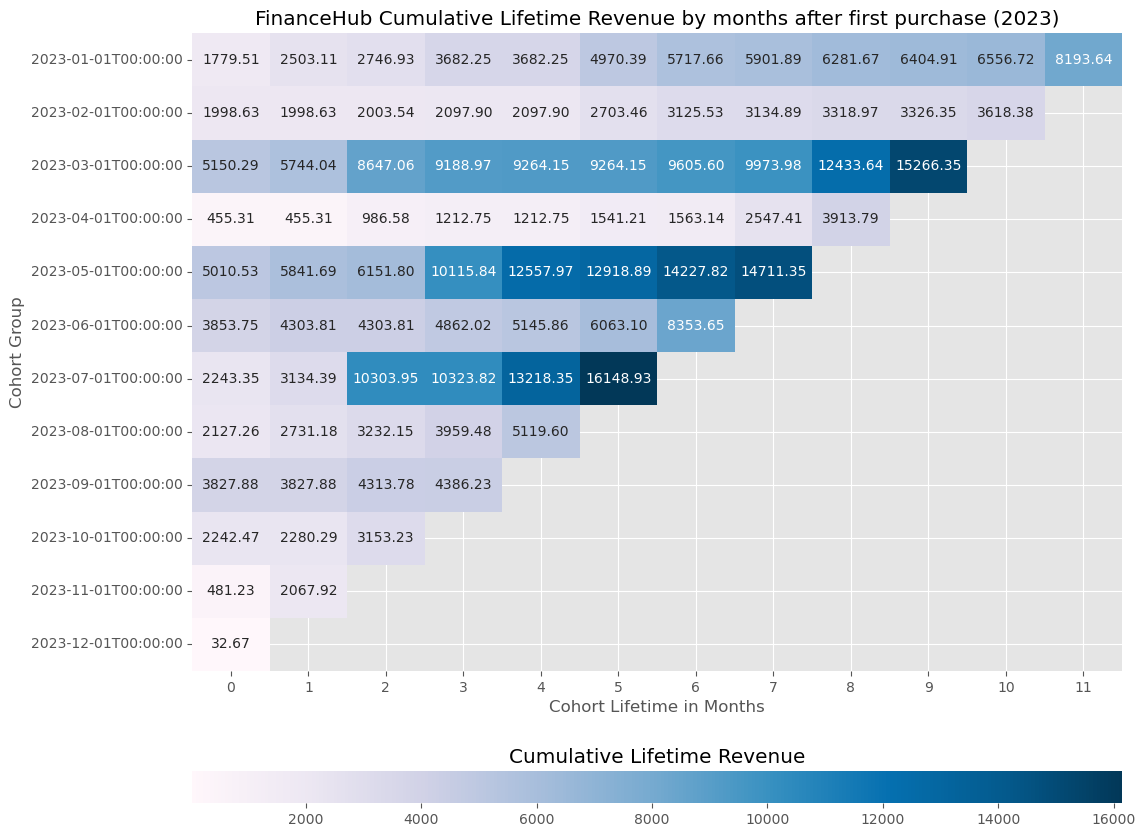

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod2_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

- Though none of the cohorts are cumulatively stagnant, generally subsequent purchases for each cohort increase only by a small margin from their initial purchase. But there are 3 cohorts with significant cumulative value, namely March, May, and July cohorts.
- March cohort starts with an initial purchase of 5k and by December had contributed 15k of revenue.
- May cohort starts with an initial purchase of 5k and by December had contributed 14k of revenue.
- July cohort starts with an initial purchase of 2k and by December had contributed 16k of revenue.
- Lesser in scale, January cohort has a consistent cumulative value, where the initial purchase was at 1779, steadily increasing to 8k by December.

In [19]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod2_2023_user.loc[prod2_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod2_cohort2 = prod2_cohort2.merge(user_max,how='left',on=['reg_month'])
prod2_cohort2 ['customer lifetime revenue'] = (prod2_cohort2['cumulative lifetime revenue'] / prod2_cohort2['user_max'])

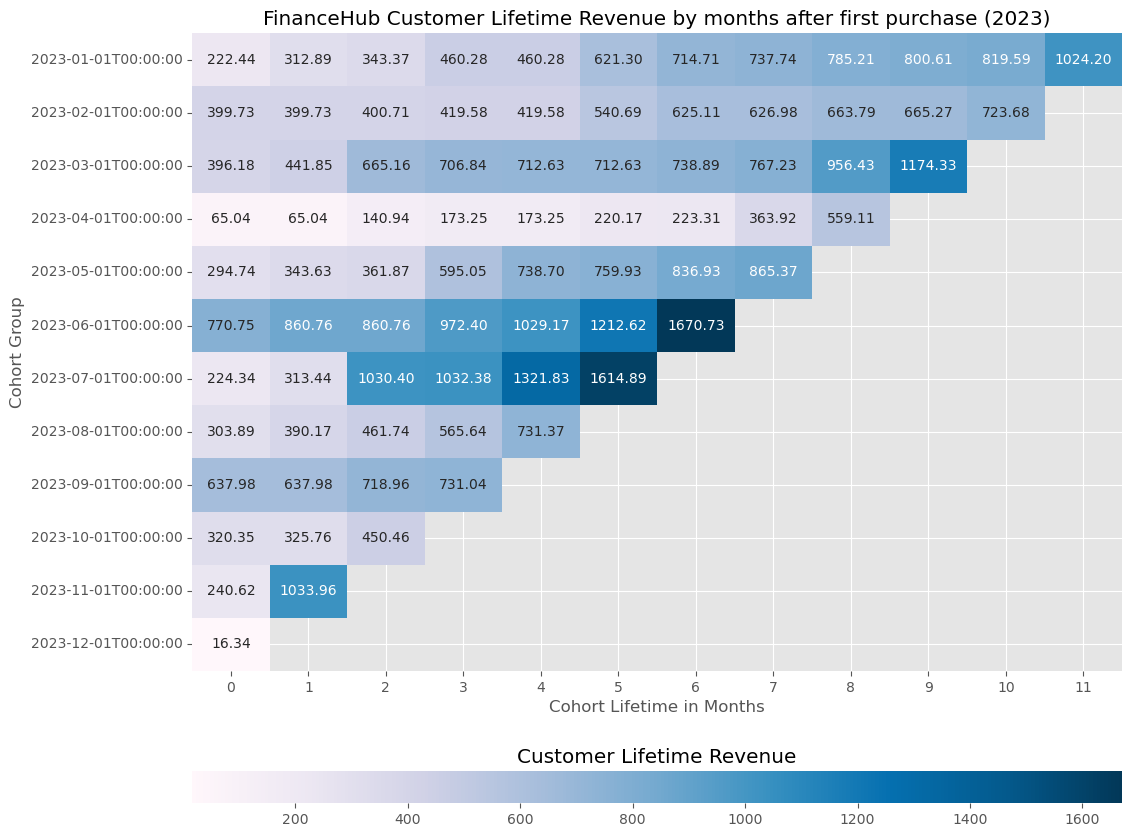

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod2_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

- Overall, FinanceHub looks to have good positive per-user values in the cohorts, with only a few cohorts stagnant during its lifetime.
- In particular, June and July cohort stands out, with both cohorts reaching cumulative value of ~1600 per user in December.

In [20]:
# CLV - but with net profit
prod2_cohort2 ['cum_net_profit'] = prod2_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod2_cohort2 ['Customer Lifetime Value'] = (prod2_cohort2['cum_net_profit'] / prod2_cohort2['user_max'])

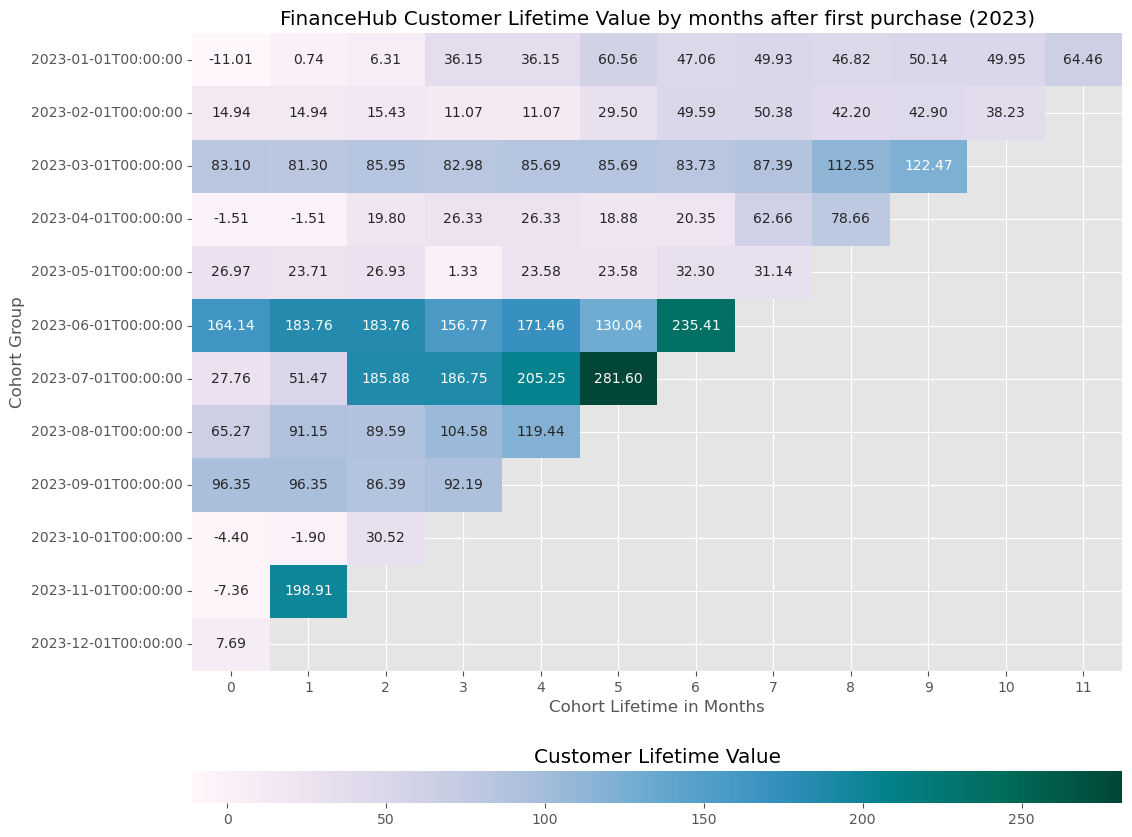

In [30]:
# Customer Lifetime Value, by cohort
pivot6 =prod2_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='FinanceHub Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

- Though there are some negative values per user in the initial month, CLV for FinanceHub is mostly positive. However, most cohort never exceed 100 in CLV during its lifetime. 
- Cohorts around Q3, June, July, August, and September tend to have higher cumulative customer value, with June and July cohort reaching around ~250 CLV per user by December. 

**Key findings:**
1. No cohort seem to have significant number of active users following their initial purchase. Retention rates of cohorts falls around 20-50% during its monthly lifetime.
2. Most cohorts have their highest purchase in their initial month at around ~2k-5k. 
3. Generally NDR rates are below 100%, though March and July are exceptions as its NDR rates would reach 300% during their best month. However, the high NDR rates are few and one-off in the cohort's lifetime.
4. In revenue, none of the cohorts are cumulatively stagnant, though subsequent purchases are only by a small margin. March, May, and July cohorts are significant exceptions where their cumulative purchases increase significantly.
5. On a per-user basis, June and July cohort stands out in both revenue and profit. Both cohorts reached a cumulative revenue of ~1600 per user and ~250 profit per user in December.
6. Though there are some negative values per user in the initial month, CLV for FinanceHub is mostly positive. However, most cohort never exceed 100 dollars in CLV during its lifetime.

### Profitability

In [21]:
# Calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives = prod2_2023[prod2_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives = prod2_2023[prod2_2023['(net)_profit_before_discount'] > 0]
# Negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# Positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# Merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# Turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# Sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

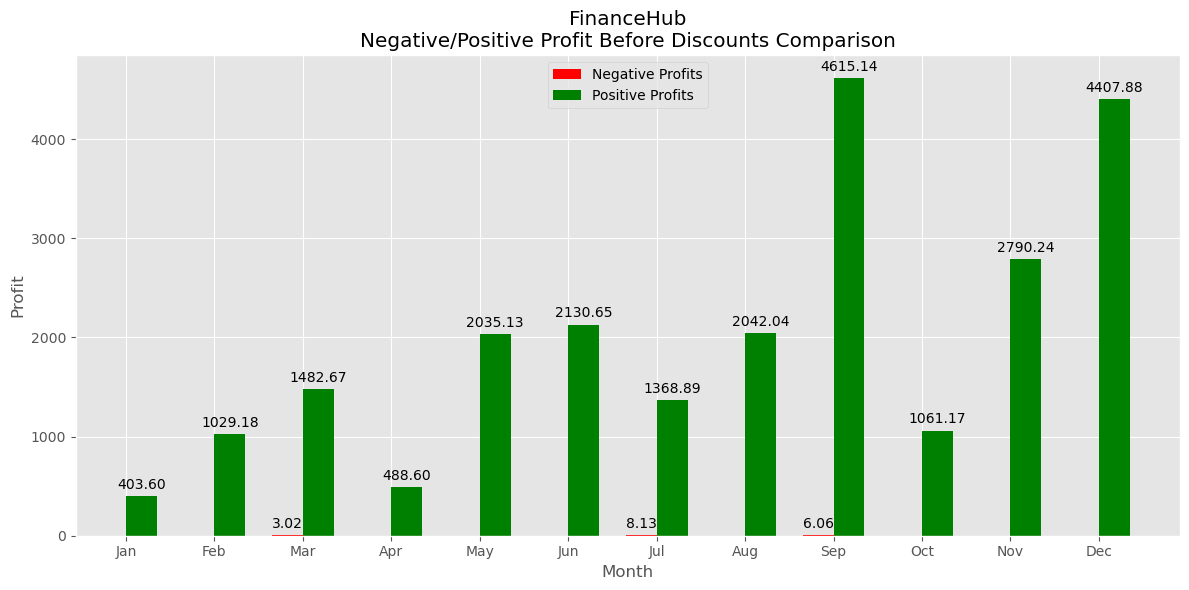

In [22]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('FinanceHub\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Pre-discounts, FinanceHub consistently had positive profits, with very few negative values (almost non-existant). This is an excellent indicator of the product's profitability and demand.
2. Highest positive profits can be seen in the months of September, November, and December (at 4615.14, 2790.24, and 4407.88 pre-discount, respectively).
3. Low profits pre-discounts can be seen in January and April. January starts the year with a modest positive profit of 403.60, while April shows a lower positive profit of 488.60 compared to other months. Both these months suggest lower sales volumes during this period.

### Discounting EDA

In [23]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod2_2023[(prod2_2023['net_profit'] < 0)]
post_discount_positives = prod2_2023[(prod2_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

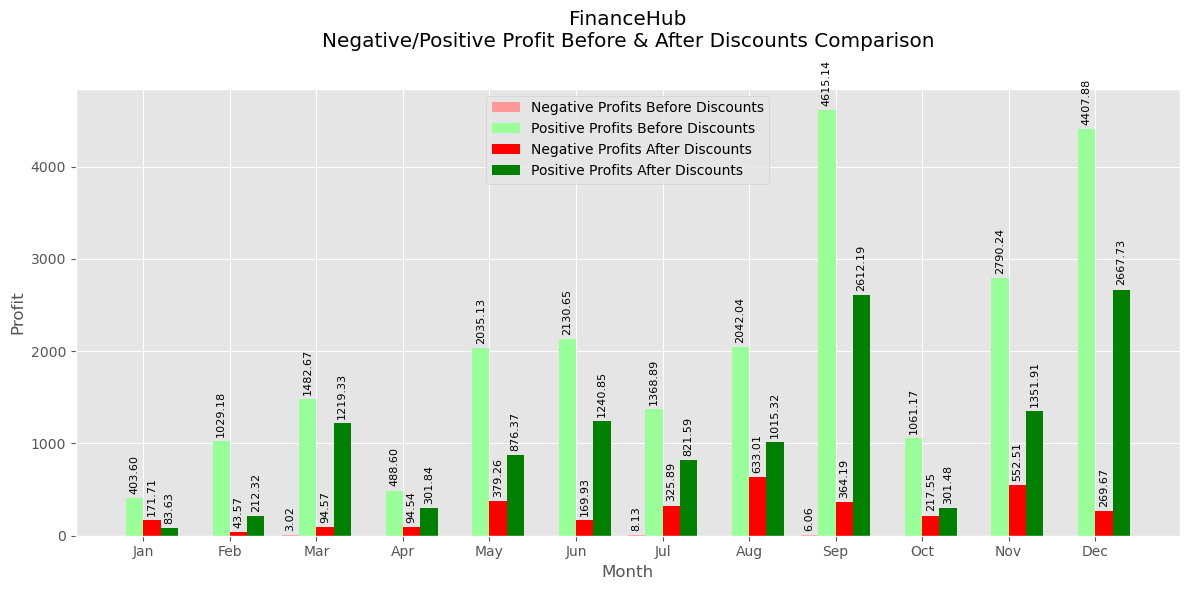

In [24]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('FinanceHub\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

- Assuming sales were made at full price, September had the highest potential profit at 4615.14. After discounts, this was reduced to 2612.19, marking a significant reduction of 2002.95. Despite this, September’s actual profit remained high at 2248.00. 
- August had the highest increase in negative profit after discounts, with an increase from 0 to 633.01. Significant increase in negative profit for August suggests that a substantial portion of sales involved heavy discounting, leading to higher negative profits. However, the month of August still maintain an overall positive profit of 382.31.
- Despite discounts, December remains the most profitable month with an overall profit of 2398.06 (positive profit = 2667.73, negative profit = 269.67). In contrast, January had the lowest potential profit before discounts (403.60) and an overall negative profit of -88.08 (positive profit = 83.63, negative profit = 171.71) after discounts. This trend is often seen in SaaS businesses due to initial costs and promotions.
- Most months maintain overall positive profits even after discounts, with only January showing a negative profit. This demonstrates the resilience of FinanceHub as a product.

C:\Users\arizk\AppData\Local\Temp\ipykernel_10484\2862836641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_name'] = filtered_df['month'].map(month_names)
C:\Users\arizk\AppData\Local\Temp\ipykernel_10484\2862836641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['month'].astype(int)


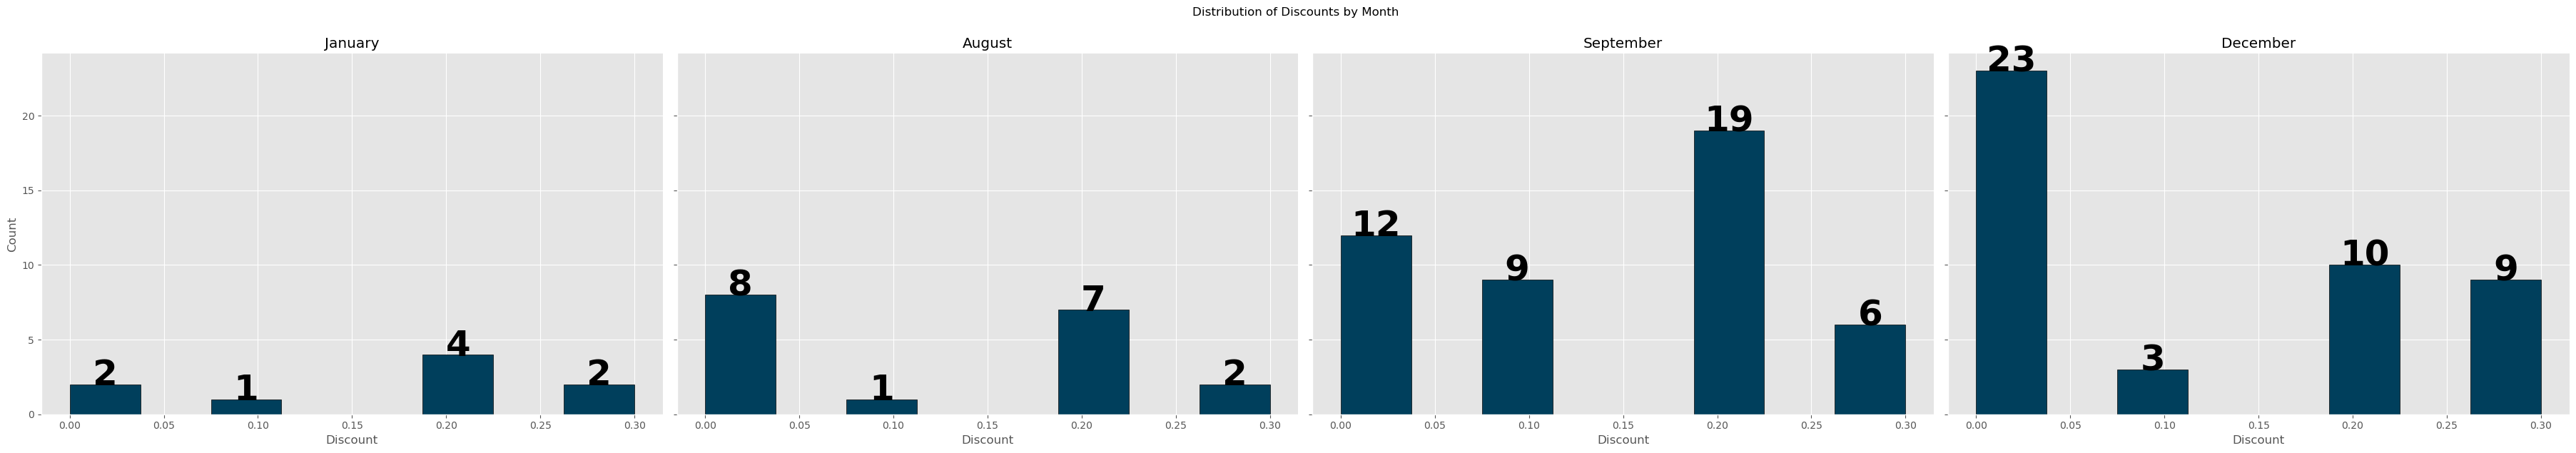

In [24]:
# Range of Discounts (January, August, September, December)
filtered_df = prod2_2023[prod2_2023['month'].isin([1, 8, 9, 12])]

# Mapping month numbers to month names
month_names = {1: "January", 8: "August", 9: "September", 12: "December"}
filtered_df['month_name'] = filtered_df['month'].map(month_names)

# Sort the DataFrame by month
filtered_df['month'] = filtered_df['month'].astype(int)
filtered_df = filtered_df.sort_values('month')

# Create the FacetGrid and set the titles
g = sns.FacetGrid(filtered_df, col="month_name", col_wrap=4, height=6, aspect=1.5, col_order=['January', 'August', 'September', 'December'])

# Function to plot histogram and annotate bars with black outlines
def plot_and_annotate_histogram(x, **kwargs):
    ax = plt.gca()
    n, bins, patches = ax.hist(x, bins=8, color='#003f5c', edgecolor='black')
    for p in patches:
        height = p.get_height()
        if height > 0:  # Annotate only bars with height
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points',
                        fontsize=36,  # Increase the fontsize
                        color='black', 
                        weight='bold')

# Map the custom function to the FacetGrid
g.map(plot_and_annotate_histogram, "Discount")

# Removing 'month_name =' from titles
for ax, title in zip(g.axes.flatten(), g.col_names):
    ax.set_title(title)

# Adding titles and labels
g.fig.suptitle('Distribution of Discounts by Month', y=1.05)
for ax in g.axes.flatten():
    ax.set_xlabel('Discount')
    ax.set_ylabel('Count')

plt.show()

- By range, discounts for FinanceHub's orders are between 10-30%. There isn't any excessive discounting (above 30%), which indicate that sales for FinanceHub are probably positive, with consistent pricing. 
- Orders with no discount are consistently high across all months, especially in December (23) and September (12). This indicate strong demand even without discounts, and that customers are willing to pay full price.
- 20% discount range is popular in September (19 orders) and December (10 orders), suggesting that a 20% discount might be an effective incentive for boosting sales during these months. January has the least number of orders overall, with the highest count being 4 orders at this range, indicating lower sales activity in this month. August accounted for 7 orders in the 20% discount range, which indicate the 20% discount range as a sweet spot that balances attracting customers and maintaining profitability.
- 30% discount range appears to be less frequently used, which indicate that it may not be as necessary as other discount rates. SaaS usually use higher discounts for rapid user acquisition, and since there's strong demand for FinanceHub a 30% discount might have the effect of devaluing its perceived worth.

In [25]:
# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean       min    median       75%      max  \
month Discount                                                             
1     0.0000    49.6669   37.5210    2.4012   37.5210   55.0809  72.6408   
      0.1000        NaN    2.3094    2.3094    2.3094    2.3094   2.3094   
      0.2000    33.7801  -18.8555  -68.1096   -5.7441    2.6190   4.1760   
      0.3000    25.9800  -45.0059  -63.3765  -45.0059  -35.8205 -26.6352   
8     0.0000   134.1129   94.1446    2.8224   24.8400  106.2660 373.7790   
      0.1000        NaN   97.6524   97.6524   97.6524   97.6524  97.6524   
      0.2000    15.7937   23.5010    5.3690   23.0280   32.3842  47.6604   
      0.3000   444.5940 -316.5066 -630.8820 -316.5066 -159.3189  -2.1312   
9     0.0000    72.3646   67.4050    7.0560   31.5410  136.8049 188.2192   
      0.1000   216.6946  145.7588   -8.0784   18.1764  213.7350 609.7157   
      0.2000    65.0325   18.5390  -57.6312    3.9474    9.3734 256.7840   
      0.3000    23.5747  -37.4884  -77.3330  -34.3949  -18.8881 -14.8704   
12    0.0000   112.2961   86.0986    1.5120   35.4900   84.0341 412.5394   
      0.1000   107.4253  150.0913   48.3136  139.5702  200.9801 262.3900   
      0.2000    46.8014   12.8244  -44.2764    5.6266   34.8925 105.2970   
      0.3000    17.1686  -17.8583  -58.5048  -14.8704   -9.0980  -2.6936   

                count  
month Discount         
1     0.0000        2  
      0.1000        1  
      0.2000        4  
      0.3000        2  
8     0.0000        8  
      0.1000        1  
      0.2000        7  
      0.3000        2  
9     0.0000       12  
      0.1000        9  
      0.2000       19  
      0.3000        6  
12    0.0000       23  
      0.1000        3  
      0.2000       10  
      0.3000        9

> Variability (std): Varying standard deviations across months reflect different business contexts and conditions. Each month presents unique challenges and opportunities that affect profit consistency. For instance, the lower standard deviations in other months suggest more stable and predictable profit patterns.

- The 30% discount range shows significant reductions in net profits across all months (negative mean, min, median, and 75%). This indicates the need for careful consideration before applying such a high discount, as it can heavily impact profitability.
- There is higher variability (higher standard deviation) in the lower discount ranges (0-10%) across all months. This suggests more inconsistency in the profitability of these ranges, indicating that their impact on net profits can be less predictable.
- The 20% discount range exhibits lower variability, indicating more consistent prices and profits compared to lower discount ranges. However, the maximum value for net profit in this range is lower, suggesting that while it is more stable, it may not drive as high profits as lower discount ranges in certain cases. At a 20% discount, customers may perceive they are getting good value for their money.

In [59]:
discount_month = prod2_2023.query("Discount > 0").groupby(['Customer ID','Month'])[['Discount']].agg('count').reset_index()
discount_month.rename(columns={'Discount': '# of Discounted Orders'}, inplace=True)
prod2_2023_user = prod2_2023_user.merge(discount_month,how='left',on=['Customer ID','Month'])

In [60]:
account_count = prod2_2023.groupby(['Customer ID','Month'])[['Order ID']].count().reset_index()
account_count.columns = ['Customer ID','Month', 'account_cnt']
prod2_2023_user = prod2_2023_user.merge(account_count,how='left',on=['Customer ID','Month'])

In [61]:
prod2_2023_user.groupby('Month')[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active', '# of Discounted Orders', 'account_cnt']].agg('sum')

,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active,# of Discounted Orders,account_cnt
Month,,,,,,,,,,
2023-01-01,27.0000,2271.1910,1779.5139,403.5950,-88.0821,8,8,8,7.0000,9.0000
2023-02-01,21.0000,3582.6520,2722.2268,1029.1816,168.7564,13,5,6,5.0000,7.0000
2023-03-01,63.0000,5749.0140,5394.1110,1479.6572,1124.7542,26,13,15,9.0000,22.0000
2023-04-01,64.0000,2270.5800,1989.2802,488.6015,207.3017,33,7,12,8.0000,17.0000
2023-05-01,110.0000,9545.9490,8007.9227,2035.1320,497.1057,50,17,24,20.0000,31.0000
2023-06-01,73.0000,8105.9520,7046.2208,2130.6530,1070.9218,55,5,16,12.0000,19.0000
2023-07-01,89.0000,5522.7700,4657.7092,1360.7608,495.7000,65,10,20,15.0000,25.0000
2023-08-01,85.0000,9248.3700,7588.6358,2042.0369,382.3027,72,7,18,10.0000,18.0000
2023-09-01,178.0000,18021.8230,15660.7435,4609.0799,2248.0004,78,6,32,34.0000,46.0000


In [62]:
prod2_2023_user[['account_cnt', '# of Discounted Orders']].sum()

account_cnt              304.0000
# of Discounted Orders   184.0000
dtype: float64

In [63]:
(184/304)*100

60.526315789473685

**Key findings:**
1. There are 304 orders for FinanceHub in 2023, 184 of which were applied discounts (60.5%). This high percentage (60.5%) indicates the importance of discount strategies in driving sales.
2. September and December are FinanceHub's peak periods. Assuming full price sales, September has had the highest potential profit at 4615.14. With discounting, this is reduced to 2612.19 (a significant reduction). Despite this, the actual profit remained high at 2248.00. December remains the most profitable month with an overall profit of 2398.06.
3. August saw the highest increase in negative profit after discounts, from 0 to 633.01. This suggests heavy discounting led to higher negative profits. However, August still maintained an overall positive profit of 382.31.
4. January had the lowest potential profit before discounts (403.60) and an overall negative profit of -88.08 after discounts, typical in SaaS businesses due to initial costs and promotional offers at the start of the year.
5. Discounts for FinanceHub's orders are between 10-30%, with no excessive discounting above 30%. High number of orders with no discounts, especially in December (23) and September (12), indicate strong demand and willingness to pay full price.
6. Within the 30% discount range there is significant reductions in net profits, requiring careful consideration. 20% discount range is consistent in profit, while lower ranges (0-10%) is more inconsistent but has the highest maximum value.
7. Overall, most months maintain overall positive profits even after discounts, with only January showing a negative profit. This demonstrates the resilience of FinanceHub as a product. 


### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod2_2023_segment = prod2_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod2_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod2_2023_percents = segment_account.merge(prod2_2023_segment,how='left',on=['Segment'])
prod2_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,53,229,17092.9610,14270.3017,3946.4085,1123.7492
1,SMB,145,579,53223.4670,44764.0907,12839.8803,4380.5040
2,Strategic,73,314,29099.1410,25931.3471,7051.6993,3883.9054


In [8]:
# calculate percentage of segment's business share by category
prod2_2023_percents['% Account']= prod2_2023_percents['account'] / prod2_2023_percents['account'].sum() *100
prod2_2023_percents['% Quantity']= prod2_2023_percents['Quantity'] / prod2_2023_percents['Quantity'].sum() *100
prod2_2023_percents['% Sales']= prod2_2023_percents['Sales'] / prod2_2023_percents['Sales'].sum() *100
prod2_2023_percents['% Net Revenue']= prod2_2023_percents['discounted_sales'] / prod2_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod2_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod2_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

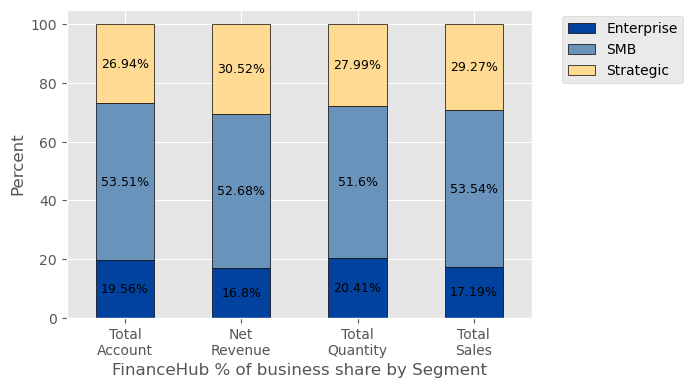

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod2_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('FinanceHub % of business share by Segment')
plt.ylabel('Percent')

-  In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "FinanceHub" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for FinanceHub based on the last year of company activity.
- Here it can be observed that the proportion of accounts, quantity, sales, and revenue are mostly proportional for each customer segment. For example, for the Enterprise segment, the amount of accounts, quantity, Sales, and Revenue are all around 20%. This is highly unlikely for real-world datasets, in which the proportions of business share would tend to be disproportional.
- SMB segment holds the highest share in Total Accounts (53.51%), Net Revenue (52.68%), Total Quantity (51.60%), and Total Sales (53.54%), indicating a dominant presence for the FinanceHub product.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

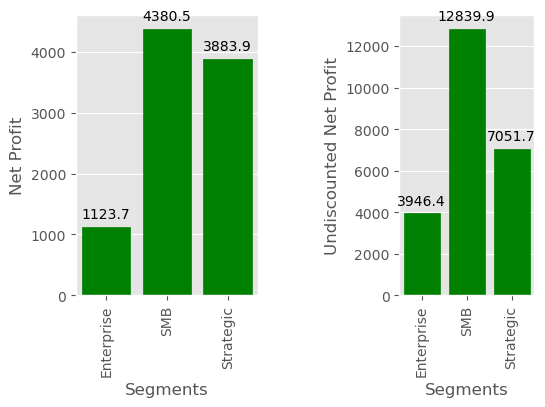

In [36]:
# FinanceHub net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod2_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod2_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads the FinanceHub product in Total Accounts (53.51%), Total Quantity (51.60%), Net Revenue (52.68%), and Total Sales (53.54%). It also shows the highest Net Profit Before Discount (12839.8803) and a substantial positive Net Profit (4380.5040), making it the top performer.
- Strategic segment maintains significant shares in Total Accounts (26.94%), Net Revenue (30.52%), Total Quantity (27.99%), and Total Sales (29.27%). It demonstrates strong financial performance with a Net Profit Before Discount (7051.6993) and a substantial positive Net Profit (3883.9054).
- Enterprise segment, while having the lowest shares compared to the other segments, still maintains a consistent presence in Total Accounts (19.56%) and Net Revenue (16.80%). It achieves a positive Net Profit of 1123.7492, demonstrating efficient cost management and profitability.

SMB segment is the top contributor to profitability for the FinanceHub product, demonstrating strong contributions in both revenue and profitability. Strategic segment closely follows, with similar profit after discounts despite only having 30.5 % in Net Revenue and 29.7% in Total Sales. Meanwhile, the Enterprise segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

In [112]:
profit_percent = prod2_2023.groupby(['Segment'])[['net_profit']].sum().reset_index()
profit_percent['% profit']= (profit_percent['net_profit'] / profit_percent['net_profit'].sum()) *100
profit_percent

,Segment,net_profit,% profit
0,Enterprise,1123.7492,11.9699
1,SMB,4380.5040,46.6599
2,Strategic,3883.9054,41.3703


- As the Strategic segment is only 30% of FinanceHub's business share, yielded 41% of its profits, and was least effected by discounts, we can say that the Strategic segment is the best performing segment for FinanceHub in 2023. 
- While Strategic may be the best performing segment, the SMB segment hold potential as the most profitable segment if sales can be made without discounts. It's best to dig further.

### Further Inquiries on Segments -----------

In [11]:
# Copy-pasted code for Industry queries within segment
# Industries using FinanceHub within the SMB Segment
prod2_2023_industry_SMB = prod2_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod2_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod2_2023_percents_SMB = SMB_account.merge(prod2_2023_industry_SMB,how='left',on=['Industry'])
prod2_2023_percents_SMB['% Account']= prod2_2023_percents_SMB['account'] / prod2_2023_percents_SMB['account'].sum() *100
prod2_2023_percents_SMB['% Quantity']= prod2_2023_percents_SMB['Quantity'] / prod2_2023_percents_SMB['Quantity'].sum() *100
prod2_2023_percents_SMB['% Sales']= prod2_2023_percents_SMB['Sales'] / prod2_2023_percents_SMB['Sales'].sum() *100
prod2_2023_percents_SMB['% Net Revenue']= prod2_2023_percents_SMB['discounted_sales'] / prod2_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod2_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod2_SMB = percents_SMB.columns.tolist()
# Industries using FinanceHub within the Strategic Segment
prod2_2023_industry_Strategic = prod2_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod2_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod2_2023_percents_Strategic = Strategic_account.merge(prod2_2023_industry_Strategic,how='left',on=['Industry'])
prod2_2023_percents_Strategic['% Account']= prod2_2023_percents_Strategic['account'] / prod2_2023_percents_Strategic['account'].sum() *100
prod2_2023_percents_Strategic['% Quantity']= prod2_2023_percents_Strategic['Quantity'] / prod2_2023_percents_Strategic['Quantity'].sum() *100
prod2_2023_percents_Strategic['% Sales']= prod2_2023_percents_Strategic['Sales'] / prod2_2023_percents_Strategic['Sales'].sum() *100
prod2_2023_percents_Strategic['% Net Revenue']= prod2_2023_percents_Strategic['discounted_sales'] / prod2_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod2_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod2_Strategic = percents_Strategic.columns.tolist()
# Industries using FinanceHub within the Enterprise Segment
prod2_2023_industry_Enterprise = prod2_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod2_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod2_2023_percents_Enterprise = Enterprise_account.merge(prod2_2023_industry_Enterprise,how='left',on=['Industry'])
prod2_2023_percents_Enterprise['% Account']= prod2_2023_percents_Enterprise['account'] / prod2_2023_percents_Enterprise['account'].sum() *100
prod2_2023_percents_Enterprise['% Quantity']= prod2_2023_percents_Enterprise['Quantity'] / prod2_2023_percents_Enterprise['Quantity'].sum() *100
prod2_2023_percents_Enterprise['% Sales']= prod2_2023_percents_Enterprise['Sales'] / prod2_2023_percents_Enterprise['Sales'].sum() *100
prod2_2023_percents_Enterprise['% Net Revenue']= prod2_2023_percents_Enterprise['discounted_sales'] / prod2_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod2_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod2_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

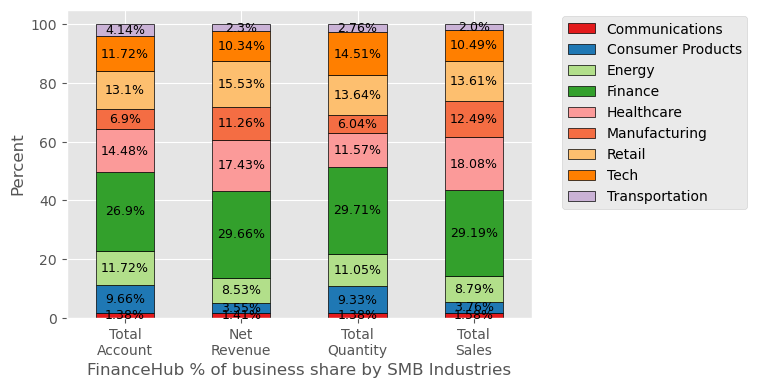

In [114]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod2_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('FinanceHub % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (26.90%), Net Revenue (29.66%), and Total Quantity (29.71%).
- Healthcare industry holds significant shares in Net Revenue (17.43%) and Total Sales (18.08%).
- Retail industry maintains consistent shares in Net Revenue (15.53%) and Total Quantity (13.64%).
- Energy, Tech, and Consumer Products industries show moderate shares across categories.
- Manufacturing industry, despite lower shares, contributes to the segment.
- Communications and Transportation industries, despite lower shares, maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

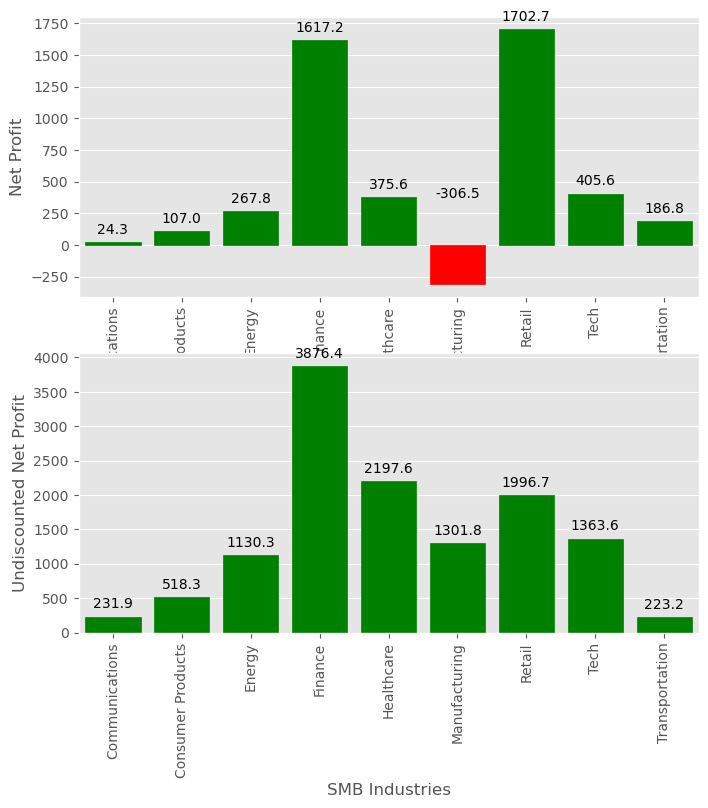

In [115]:
# FinanceHub net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod2_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod2_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads in Total Accounts (26.90%), Net Revenue (29.66%), and Total Quantity (29.71%). It also achieves the highest Net Profit of 1617.2386, making it a key contributor to profitability in the SMB segment.
- Retail industry shows strong financial performance with a significant positive Net Profit of 1702.6581.
- Healthcare industry holds significant shares in Net Revenue (17.43%) and Total Sales (18.08%), achieving a positive Net Profit of 375.5779.
- Tech, Energy, and Consumer Products industries maintain consistent shares across categories, contributing positively to the SMB segment with positive net profits of 405.6347, 267.7792, and 107.0144, respectively.
- Communications and Transportation industries, despite lower shares, maintain positive net profits of 24.3416 and 186.7892, respectively.
- Manufacturing industry, despite moderate shares, reports a negative Net Profit of -306.5297, indicating areas for cost optimization.

Finance, Retail, and Healthcare industries are key contributors to profitability within the SMB segment of the FinanceHub product, demonstrating strong contributions in both revenue and profitability. The Tech, Energy, Consumer Products, Communications, and Transportation industries also show positive financial performance. The Manufacturing industry, despite having significant shares, faces challenges in achieving profitability, indicating areas for potential improvement.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

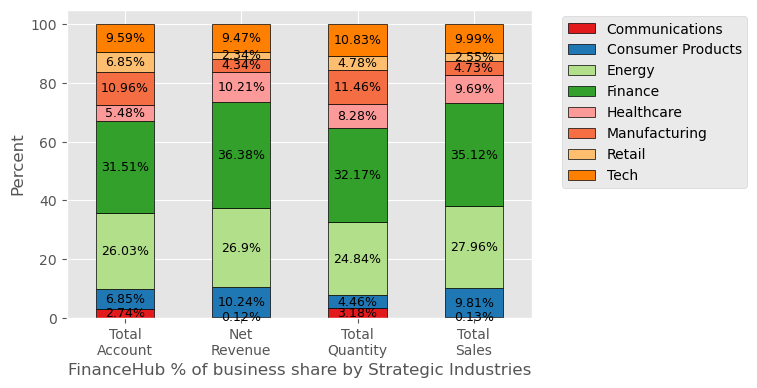

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod2_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('FinanceHub % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (31.51%), Net Revenue (36.38%), and Total Quantity (32.17%), showing significant presence in the Strategic segment.
- Energy industry holds strong positions with notable shares in Total Accounts (26.03%), Net Revenue (26.90%), and Total Quantity (24.84%).
- Healthcare and Consumer Products industries maintain consistent shares in Net Revenue and Total Sales, contributing significantly to the segment.
- Tech and Manufacturing industries show moderate shares across categories.
- Communications and Retail industries, despite lower shares, maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech')])

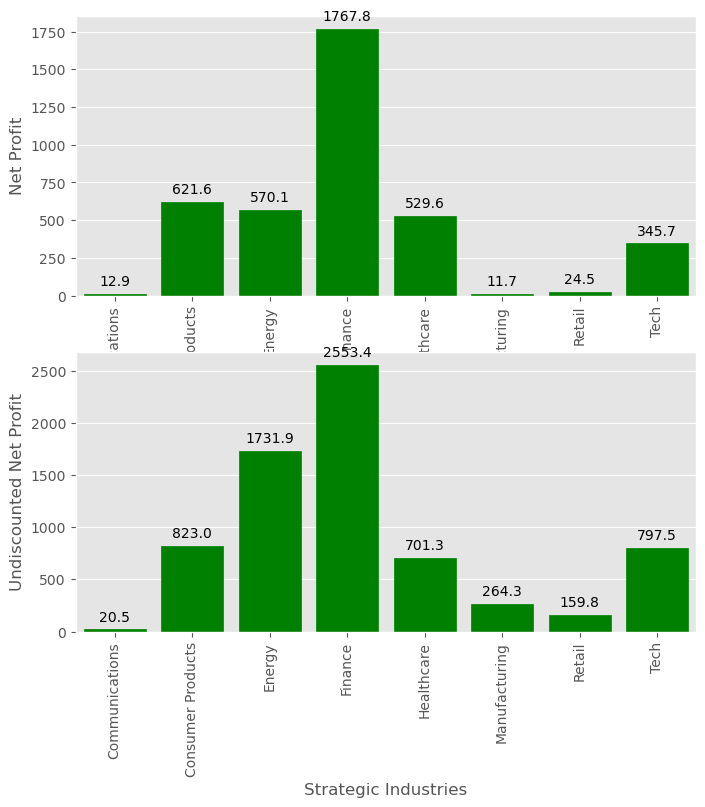

In [41]:
# FinanceHub net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod2_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod2_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads in Total Accounts (31.51%), Net Revenue (36.38%), and Total Quantity (32.17%). It also achieves the highest Net Profit of 1767.7960, making it the top performer in the Strategic segment.
- Consumer Products and Tech industries show strong financial performance with significant positive net profits of 621.6006 and 345.6667, respectively.
- Healthcare industry maintains consistent shares across categories, achieving a positive Net Profit of 529.6295.
- Energy industry, despite leading in Total Accounts (26.03%) and Net Revenue (26.90%), reports a moderate Net Profit of 570.0953.
- Manufacturing, Retail, and Communications industries, despite lower shares, maintain positive net profits of 11.7388, 24.4833, and 12.8952, respectively.
- Retail and Communications industries have relatively lower contributions but still show positive financial performance.

Finance, Consumer Products, and Tech industries are key contributors to profitability within the Strategic segment of the FinanceHub product, demonstrating strong contributions in both revenue and profitability. The Healthcare and Energy industries also show positive financial performance. The Manufacturing, Retail, and Communications industries, while having lower shares, still contribute positively to the overall success of the Strategic segment.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

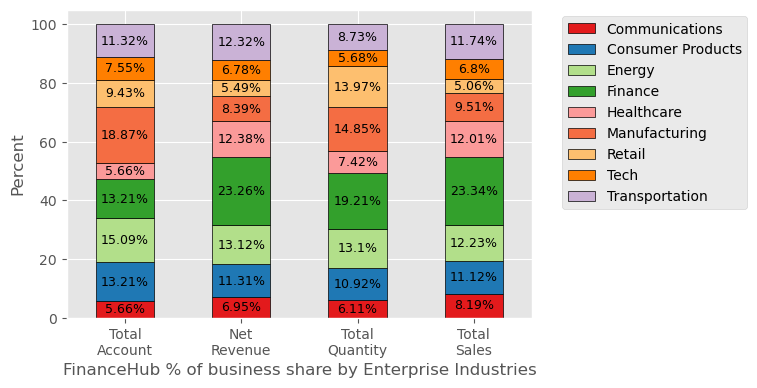

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod2_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('FinanceHub % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Finance industry leads in Net Revenue (23.26%) and Total Sales (23.34%), indicating strong financial performance.
- Manufacturing industry holds significant shares in Total Accounts (18.87%) and Total Quantity (14.85%).
- Energy industry shows strong performance across categories, maintaining consistent shares in Total Accounts (15.09%) and Net Revenue (13.12%).
- Healthcare industry, while having moderate shares, maintains notable presence in Net Revenue (12.38%) and Total Sales (12.01%).
- Transportation industry shows significant presence in Total Accounts (11.32%) and Total Sales (11.74%).
- Consumer Products, Tech, Communications, and Retail industries, while having lower shares, still contribute to the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

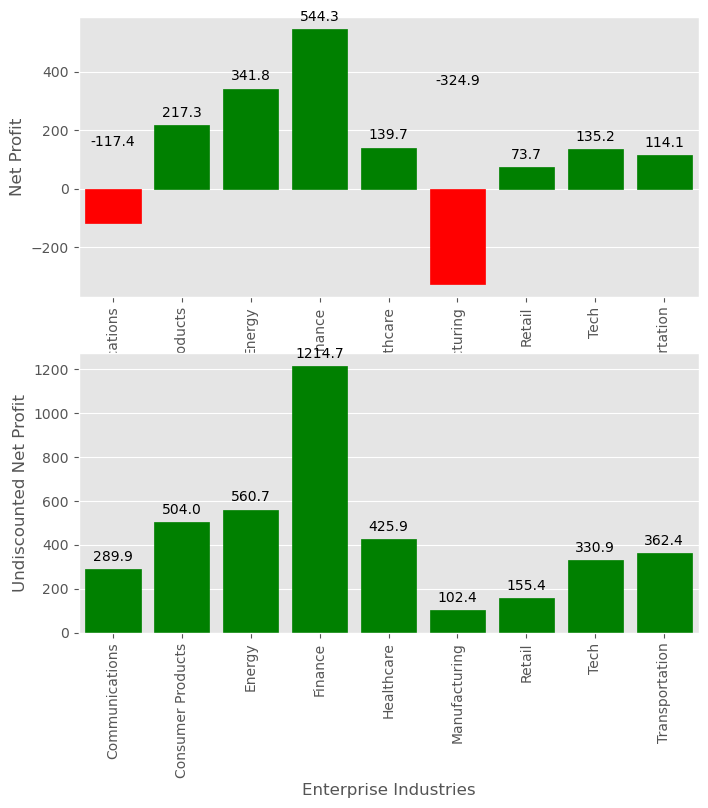

In [43]:
# FinanceHub net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod2_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod2_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads in Net Revenue (23.26%) and Total Sales (23.34%), achieving the highest Net Profit of 544.3068, making it the top performer in the Enterprise segment.
- Energy industry shows strong financial performance with a significant positive Net Profit of 341.7764.
- Consumer Products, Healthcare, Tech, Retail, and Transportation industries maintain positive net profits of 217.2518, 139.7396, 135.1886, 73.7128, and 114.0830, respectively.
- Communications and Manufacturing industries, despite having significant shares, report negative net profits of -117.4080 and -324.9018, respectively, indicating areas for cost optimization.

Finance and Energy industries are key contributors to profitability within the Enterprise segment of the FinanceHub product, demonstrating strong contributions in both revenue and profitability. The Consumer Products, Healthcare, Tech, Retail, and Transportation industries also show positive financial performance. The Communications and Manufacturing industries, despite having significant shares, face challenges in achieving profitability, indicating areas for potential improvement.

**Key Findings:** 
1. SMB and Strategic segments are the top performers for the FinanceHub product. SMB leads with 53.51% of Total Accounts, 52.68% of Net Revenue, and a Net Profit of 4380.50. The Strategic segment follows, with 26.94% of Total Accounts, 30.52% of Net Revenue, and a Net Profit of 3883.91. The Enterprise segment, though smaller, remains profitable with a Net Profit of 1,123.75. Abandoning Enterprise could mean lost opportunities. A balanced strategy focusing on SMBs and Strategic segments while maintaining Enterprise is the best approach.

### Regional EDA

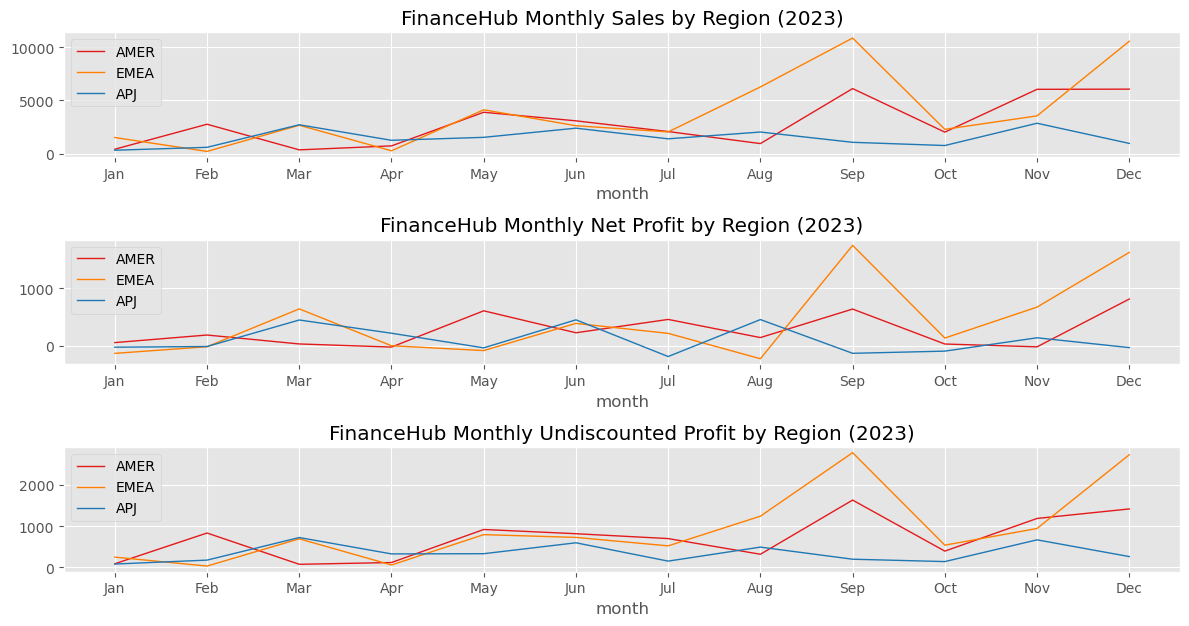

In [10]:
# FinanceHub Monthly Income EDA by Region (2023)
prod2_region_month = prod2_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod2_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod2_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod2_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('FinanceHub Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod2_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod2_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod2_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('FinanceHub Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod2_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod2_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod2_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('FinanceHub Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

Performance fluctuate across regions and months, with EMEA having the highest performance in September and December, while AMER has notable performance in February and December. APJ shows a lower, but more consistent performance. For all regions, discounts has had a negative effect on some months.
- AMER shows strong performance in terms of sales and net profit in September and December, with notable dips in months like March and April. Discounts have varied impacts on profits, sometimes leading to negative net profits despite high sales, which can be seen in April and November.
- EMEA region displays a substantial performance in terms of both sales and net profit in September and December, while it faces challenges in months like February and August. Discounting has lead to negative net profits in certain months, such as January, February, May, and August.
- APJ region shows a strong performance in terms of sales in March, June, and November, with notable net profits in these months. However, discounting has severely affected this region, with January, February, May, July, September, October, and December having negative net profits.

Performance Highlights
- Highest Sales: In EMEA, September shows the highest sales of 10844.71.
- Highest Net Profit: The highest net profit is seen in EMEA, September, with a net profit of 1736.31.
- Highest Undiscounted Profit: EMEA in September also shows the highest undiscounted profit at 2784.29.

In [12]:
prod2_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,4,423.4540,399.2972,83.2094,59.0526
1,AMER,2,14,2764.6100,2123.7090,830.4390,189.5380
2,AMER,3,8,362.8520,328.7816,69.7348,35.6644
3,AMER,4,30,735.4460,604.4348,112.8217,-18.1895
4,AMER,5,52,3888.4800,3579.2408,916.4644,607.2252
5,AMER,6,28,3083.9440,2498.9316,813.6068,228.5944
6,AMER,7,37,2079.9080,1843.2424,695.3349,458.6693
7,AMER,8,27,951.9480,783.4104,314.2054,145.6678
8,AMER,9,75,6106.9660,5113.1322,1631.3279,637.4941
9,AMER,10,47,2025.2500,1669.4980,390.3574,34.6054


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

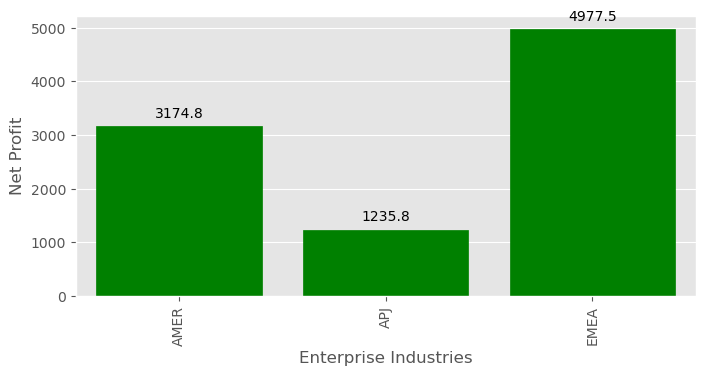

In [13]:
prod2_region = prod2_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod2_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [14]:
prod2_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,430,34515.7960,29232.2572,8458.3621,3174.8233
1,APJ,197,17936.8270,15074.2641,4098.3718,1235.8089
2,EMEA,495,46962.9460,40659.2182,11281.2542,4977.5264


High-Performing Region
- EMEA region is performing the best in terms of both sales and net profit, followed by the AMER region.
- Needs to manage discount strategies better to avoid negative profits and stabilize sales.

Challenging Region
- APJ region has the lowest sales and net profit among the three regions.
- Should focus on increasing sales volume and minimizing the impact of discounts on profits.

In [11]:
grouped = prod2_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [12]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

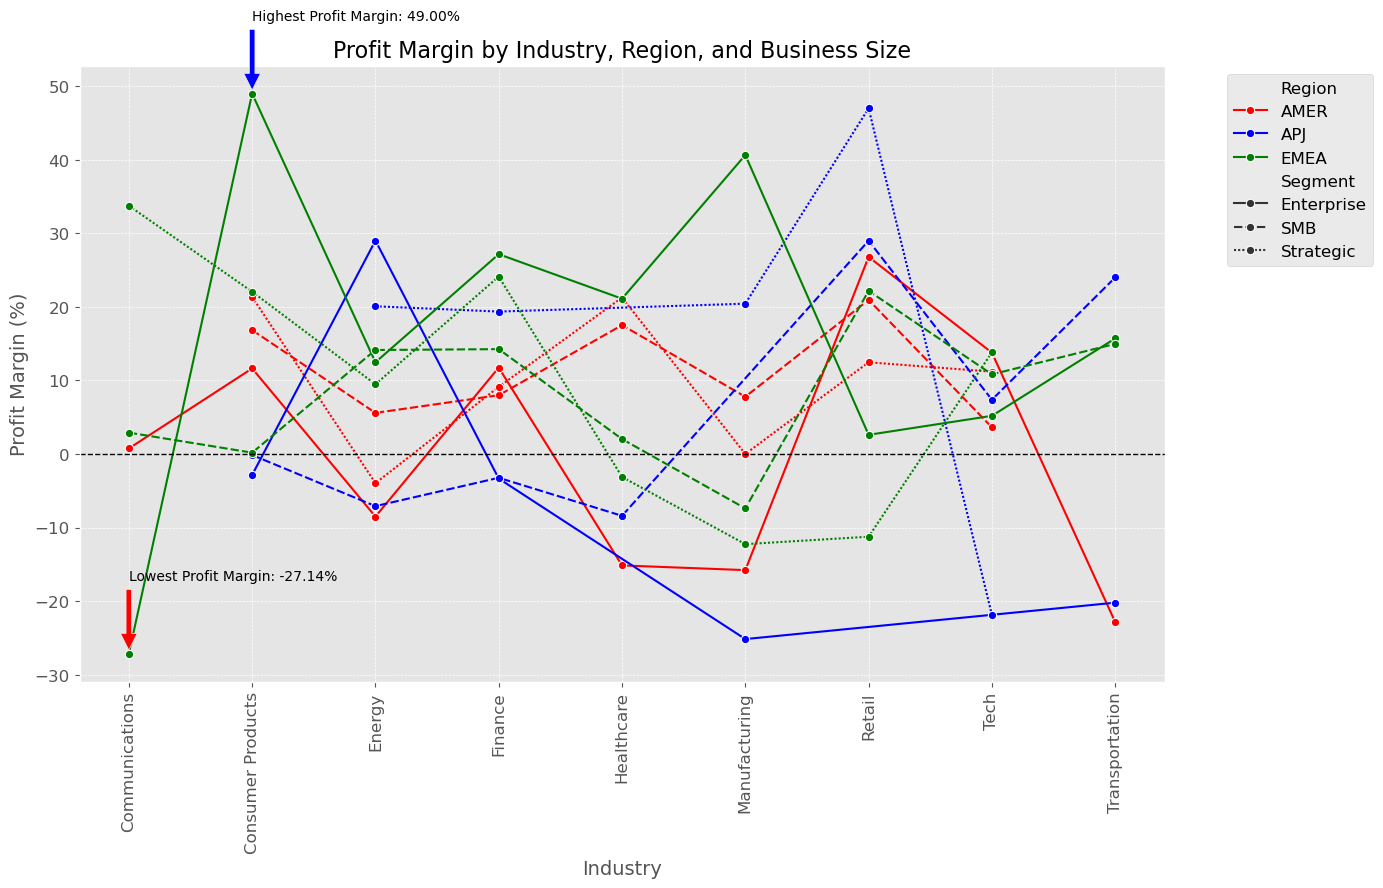

In [14]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [15]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

#### Cross-segment SMB

In [16]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

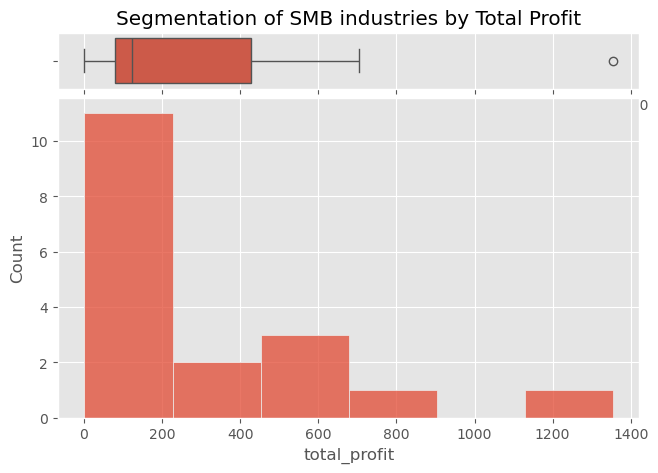

0.0000      1.3054
0.2500     78.2661
0.5000    121.8511
0.7500    426.8916
1.0000   1354.2123
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 426.89 in profit
- 3 (Good) : Contributes between 121.85 and 426.89 in profit
- 2 (Marginal) : Contributes between 78.27 and 121.85 in profit
- 1 (Underperforming) : Contributes less than 78.27 in profit


In [17]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [18]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
52,EMEA,SMB,Finance,1354.2123,0.1130,4
55,EMEA,SMB,Retail,705.2771,0.0700,4
32,APJ,SMB,Retail,523.7052,0.0000,4
14,AMER,SMB,Retail,473.6758,0.1091,4
12,AMER,SMB,Healthcare,457.5427,0.1143,4
51,EMEA,SMB,Energy,334.9381,0.1250,3
11,AMER,SMB,Finance,326.1413,0.0556,3
56,EMEA,SMB,Tech,206.6731,0.1333,3
33,APJ,SMB,Tech,129.5538,0.2000,3
57,EMEA,SMB,Transportation,114.1484,0.0800,2


In [19]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Retail in EMEA, Retail in APJ, Retail in AMER, Healthcare in AMER are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Energy in EMEA, Finance in AMER, Tech in EMEA, Tech in APJ all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Transportation in EMEA, Consumer Products in AMER, Healthcare in EMEA, Manufacturing in AMER, Transportation in APJ, Tech in AMER, Energy in AMER, Communications in EMEA, Consumer Products in EMEA are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency 

In [20]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

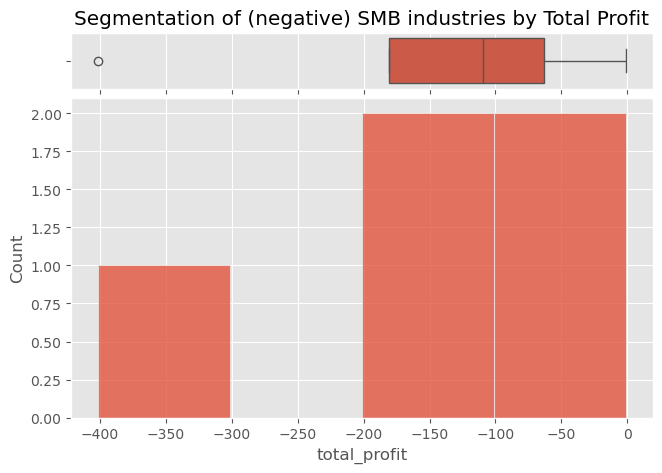

0.0000   -401.6716
0.2500   -180.6724
0.5000   -109.7781
0.7500    -63.1150
1.0000     -0.8912
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -180.67 in profit
- 3 (Significant) : Loses between -180.67 and -109.78 in profit
- 2 (Negative) : Loses between -109.78 and -63.12 in profit
- 1 (Marginal) : Loses less than -63.12 in profit


In [21]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [22]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
54,EMEA,SMB,Manufacturing,-401.6716,0.1143,4
31,APJ,SMB,Healthcare,-180.6724,0.3000,4
29,APJ,SMB,Energy,-109.7781,0.2333,3
30,APJ,SMB,Finance,-63.1150,0.2286,2
28,APJ,SMB,Consumer Products,-0.8912,0.2333,1


In [23]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_negative_profit_metrics[smb_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4,3], "are SMB industries contributing to substantial losses and are considered high-risk.\nStrategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")


Manufacturing in EMEA, Healthcare in APJ, Energy in APJ are SMB industries contributing to substantial losses and are considered high-risk.
Strategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Finance in APJ, Consumer Products in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [33]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the SMB segment
total_metrics_SMB = prod2_2023.query("Segment == 'SMB'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter
prod2_2023_industry_region_SMB = prod2_2023.query("Segment == 'SMB' and net_profit < 0 ").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
SMB_account = prod2_2023.query("Segment == 'SMB'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod2_2023_percents_SMB = SMB_account.merge(prod2_2023_industry_region_SMB, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod2_2023_percents_SMB = prod2_2023_percents_SMB.dropna()

# Calculate percentages
prod2_2023_percents_SMB['% Account'] = prod2_2023_percents_SMB['account'] / SMB_account['account'].sum() * 100
prod2_2023_percents_SMB['% Quantity'] = prod2_2023_percents_SMB['Quantity'] / total_metrics_SMB['Quantity'] * 100
prod2_2023_percents_SMB['% Sales'] = prod2_2023_percents_SMB['Sales'] / total_metrics_SMB['Sales'] * 100
prod2_2023_percents_SMB['% Net Revenue'] = prod2_2023_percents_SMB['discounted_sales'] / total_metrics_SMB['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Manufacturing', 'Healthcare', 'Energy']
specific_regions = ['APJ', 'EMEA']
filtered_SMB = prod2_2023_percents_SMB[(prod2_2023_percents_SMB['Industry'].isin(specific_industries)) & 
                                       (prod2_2023_percents_SMB['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [31]:
# all SMB industries percentage (all profits, positive and negative); if you all numbers vertically it will sum to 100
prod2_2023_percents_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

% Account  % Quantity  % Sales  % Net Revenue
Industry          Region                                               
Communications    EMEA       1.3793      1.3817   1.5755         1.4095
Consumer Products AMER       4.1379      3.7997   1.1893         1.1716
                  APJ        2.0690      2.0725   1.1728         0.9814
                  EMEA       3.4483      3.4542   1.4003         1.4017
Energy            AMER       2.7586      2.7634   1.4331         1.3967
                  APJ        4.1379      3.6269   2.9073         2.4370
                  EMEA       4.8276      4.6632   4.4516         4.6930
Finance           AMER       9.6552     10.7081   7.6754         7.8171
                  APJ        4.8276      4.4905   3.6618         3.1394
                  EMEA      12.4138     14.5078  17.8517        18.7016
Healthcare        AMER       4.8276      5.0086   4.9069         5.3932
                  APJ        3.4483      2.5907   4.0365         3.3595
                  EMEA       6.2069      3.9724   9.1369         8.6741
Manufacturing     AMER       2.0690      1.7271   2.2977         2.1877
                  EMEA       4.8276      4.3178  10.1931         9.0706
Retail            AMER       6.8966      7.5993   4.2475         4.6430
                  APJ        0.6897      1.0363   3.3930         4.0342
                  EMEA       5.5172      5.0086   5.9743         6.8536
Tech              AMER       4.8276      6.7358   3.6058         3.6275
                  APJ        2.7586      3.7997   3.3020         3.3598
                  EMEA       4.1379      3.9724   3.5861         3.3496
Transportation    APJ        0.6897      0.5181   0.5687         0.6761
                  EMEA       3.4483      2.2453   1.4325         1.6220

In [ ]:
# Total Share (includes industries with positive (mixed) net profit)
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry      Region                                               
Energy        APJ        4.1379      3.6269   2.9073         2.4370
              EMEA       4.8276      4.6632   4.4516         4.6930
Healthcare    APJ        3.4483      2.5907   4.0365         3.3595
              EMEA       6.2069      3.9724   9.1369         8.6741
Manufacturing EMEA       4.8276      4.3178  10.1931         9.0706

In [34]:
# Only industries with negative profit
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry      Region                                               
Energy        APJ        4.1379      2.2453   2.8445         2.3674
              EMEA       4.8276      0.6908   0.4050         0.3371
Healthcare    APJ        3.4483      2.5907   4.0365         3.3595
              EMEA       6.2069      0.5181   1.6671         1.3875
Manufacturing EMEA       4.8276      1.5544   8.2974         6.9058

In the SMB segment, Manufacturing in EMEA, Healthcare in APJ, and Energy in APJ contribute to the most significant losses. However, some of these sectors hold a substantial share of the SMB segment. Specifically, the Healthcare industry in the SMB segment holds significant shares in Total Accounts (14.48%), Total Sales (18.08%), and Net Revenue (17.43%). Manufacturing, despite its high losses, still holds substantial shares with 6.9% in Total Accounts, 12.49% in Total Sales, and 11.26% in Net Revenue.

Manufacturing in EMEA represents the majority of Manufacturing's share, with 4.8% in Total Accounts, 10.2% in Total Sales, and 9.07% in Net Revenue. In contrast, Healthcare in APJ holds minimal shares with 3.44% in Total Accounts, 4.03% in Total Sales, and 3.36% in Net Revenue.

Despite notable losses, Manufacturing in EMEA's significant contribution to SMB shares cannot be overlooked, while Healthcare in APJ remains relatively marginal.

In [35]:
# to see detailed Discounted orders for the SMB "Severe" Category
filtered_SMB2 = prod2_2023[(prod2_2023['Industry'].isin(specific_industries)) & (prod2_2023['Region'].isin(specific_regions)) & (prod2_2023['net_profit'] < 0) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [36]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Energy,APJ,0.3000,4
1,Energy,EMEA,0.3000,1
2,Healthcare,APJ,0.3000,6
3,Healthcare,EMEA,0.3000,1
4,Manufacturing,EMEA,0.3000,1


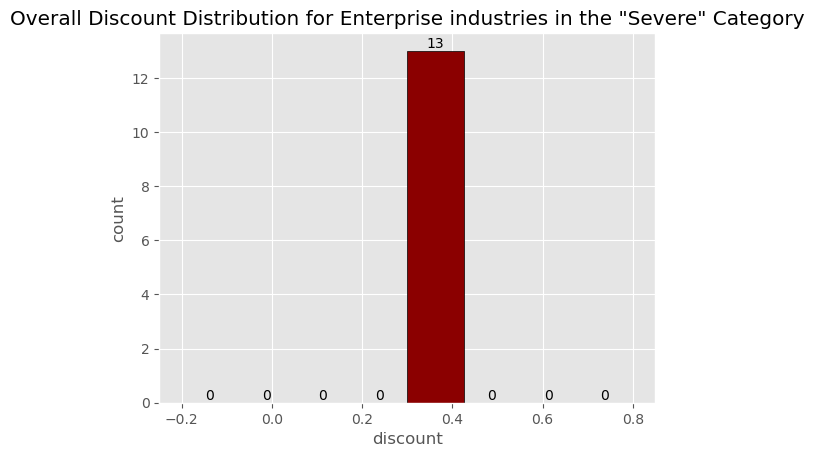

In [38]:
n, bins, patches = plt.hist(data=filtered_SMB3, x='Discount', bins=8, color='#8B0000', edgecolor='black')
plt.title('Overall Discount Distribution for Enterprise industries in the "Severe" Category')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

In [41]:
prod2_2023[(prod2_2023['Region'] == 'EMEA') & (prod2_2023['Industry'] == 'Manufacturing') & (prod2_2023['Segment'] == 'SMB') & (prod2_2023['net_profit'] < 0)]

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month
7243,EMEA-2023-118892,2023-08-18,20230818,1043,Siemens,SMB,Manufacturing,EMEA,EU-WEST,France,Paris,FinanceHub,4416.1740,9,0.3000,-630.8820,1324.8522,490.6860,693.9702,-70.0980,-14.2857,3091.3218,8,2023,2023-08


- From the chart above, we can see all SMB industries with severe losses receive discounts in the 30% range. From previous analysis in discounting, we have seen that the 30% discount range can heavily impact profitability for Financehub. Applied to one of EMEA's SMB Manufacturing industries (Siemens), this had amounted to -630.8820 loss in profit.
- It's crucial to rethink discount strategies for Manufacturing in EMEA, Healthcare in APJ, and Energy in APJ. Balance revenue and profitability with smart, efficient measures. Measure operational costs alongside marketing and discounting to ensure overall profitability.
- While less severe, Finance and Consumer Products industries in APJ are also suffering losses. They need attention to avoid slipping into more significant losses.

#### Cross-segment Strategic

In [42]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

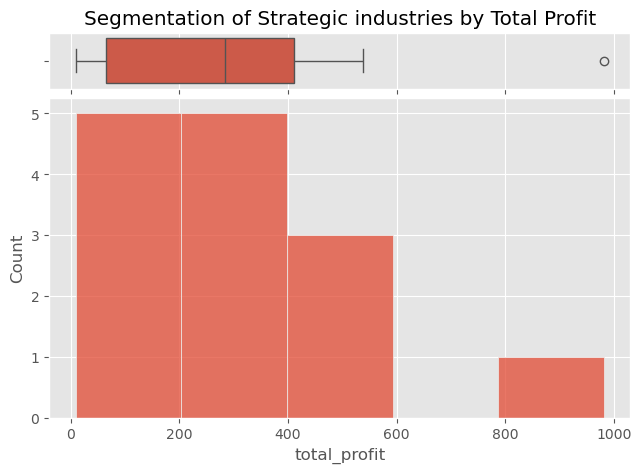

0.0000     8.6715
0.2500    64.9924
0.5000   282.8908
0.7500   410.9800
1.0000   981.5341
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 410.98 in profit
- 3 (Good) : Contributes between 282.89 and 410.98 in profit
- 2 (Marginal) : Contributes between 64.99 and 282.89 in profit
- 1 (Underperforming) : Contributes less than 64.99 in profit


In [43]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")

In [44]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
61,EMEA,Strategic,Finance,981.5341,0.0167,4
19,AMER,Strategic,Healthcare,538.6253,0.0800,4
35,APJ,Strategic,Energy,490.8862,0.2000,4
36,APJ,Strategic,Finance,425.8070,0.1250,4
59,EMEA,Strategic,Consumer Products,366.4990,0.1333,3
18,AMER,Strategic,Finance,360.4549,0.1111,3
65,EMEA,Strategic,Tech,310.6800,0.0750,3
16,AMER,Strategic,Consumer Products,255.1016,0.1000,2
60,EMEA,Strategic,Energy,215.0802,0.1364,2
37,APJ,Strategic,Manufacturing,78.3364,0.0667,2


In [46]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([2, 3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in EMEA, Healthcare in AMER, Energy in APJ, Finance in APJ are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Consumer Products in EMEA, Finance in AMER, Tech in EMEA, Consumer Products in AMER, Energy in EMEA, Manufacturing in APJ all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Tech in AMER, Retail in AMER, Communications in EMEA, Retail in APJ are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [47]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

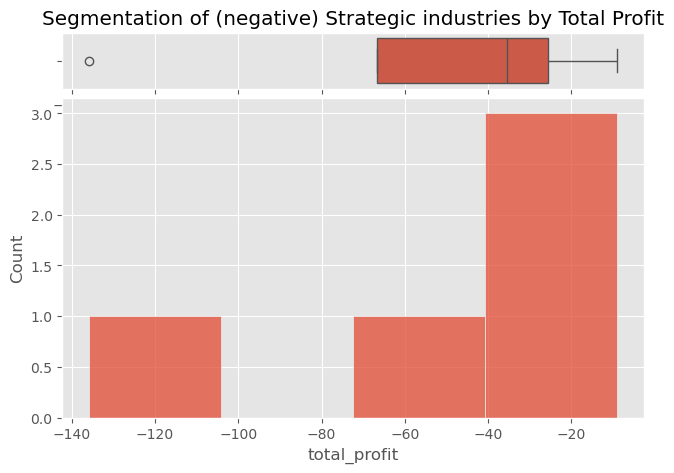

0.0000   -135.8711
0.2500    -66.5976
0.5000    -35.3646
0.7500    -25.5577
1.0000     -8.9958
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -66.60 in profit
- 3 (Significant) : Loses between -66.60 and -35.36 in profit
- 2 (Negative) : Loses between -35.36 and -25.56 in profit
- 1 (Marginal) : Loses less than -25.56 in profit


In [48]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [49]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
17,AMER,Strategic,Energy,-135.8711,0.1857,4
63,EMEA,Strategic,Manufacturing,-66.5976,0.1800,4
64,EMEA,Strategic,Retail,-35.3646,0.2000,3
39,APJ,Strategic,Tech,-25.5577,0.2500,2
62,EMEA,Strategic,Healthcare,-8.9958,0.2000,1


Losses in the Strategic segment doesnt seem to be as severe as the SMB segment. 

In [51]:
prod2_2023[(prod2_2023['Region'] == 'AMER') & (prod2_2023['Industry'] == 'Energy') & (prod2_2023['Segment'] == 'Strategic') & (prod2_2023['net_profit'] < 0)]

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month
1367,AMER-2023-155425,2023-11-11,20231111,1018,Petrobras,Strategic,Energy,AMER,LATAM,Chile,Santiago,FinanceHub,899.1360,4,0.2000,-146.1096,179.8272,224.7840,33.7176,-36.5274,-16.2500,719.3088,11,2023,2023-11
2121,AMER-2023-158246,2023-11-10,20231110,1031,Royal Dutch Shell,Strategic,Energy,AMER,NAMER,United States,Sacramento,FinanceHub,215.9760,3,0.2000,-2.6997,43.1952,71.9920,40.4955,-0.8999,-1.2500,172.7808,11,2023,2023-11
7104,AMER-2023-128944,2023-06-20,20230620,1024,ConocoPhillips,Strategic,Energy,AMER,LATAM,Mexico,Monterrey,FinanceHub,760.1160,6,0.3000,-43.4352,228.0348,126.6860,184.5996,-7.2392,-5.7143,532.0812,6,2023,2023-06
7955,AMER-2023-131807,2023-10-06,20231006,1027,Gazprom,Strategic,Energy,AMER,NAMER,United States,Springfield,FinanceHub,435.1680,4,0.2000,-59.8356,87.0336,108.7920,27.1980,-14.9589,-13.7500,348.1344,10,2023,2023-10


For orders from the Strategic Energy industry in AMER that result in a negative profit, we can assume that this is due to high discounts (20% and 30%) and possibly high costs related to production, operations, and delivery. These factors reduce the overall revenue, leading to a negative profit. Reassessing discount strategies and managing costs could help improve profitability.

#### Cross-segment Enterprise

In [50]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)
enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount
3,AMER,Enterprise,Finance,346.0064,0.2000
44,EMEA,Enterprise,Healthcare,262.3900,0.1000
24,APJ,Enterprise,Energy,241.1564,0.1000
48,EMEA,Enterprise,Transportation,229.0608,0.0667
1,AMER,Enterprise,Consumer Products,207.7871,0.1600
43,EMEA,Enterprise,Finance,207.6064,0.0000
42,EMEA,Enterprise,Energy,123.5280,0.1250
7,AMER,Enterprise,Tech,120.0970,0.1000
6,AMER,Enterprise,Retail,56.6980,0.0667
45,EMEA,Enterprise,Manufacturing,21.5738,0.1600


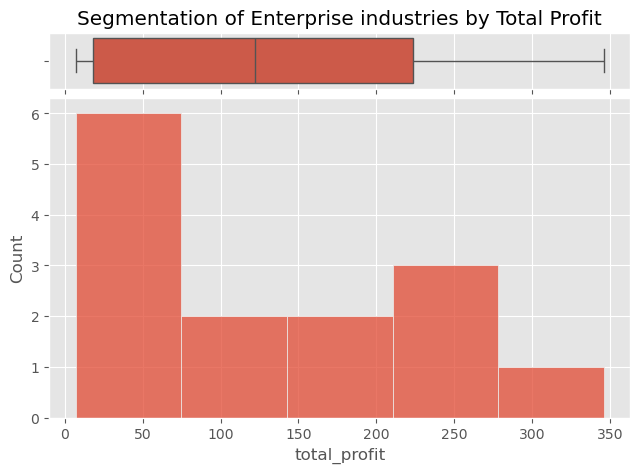

0.0000     7.0230
0.2500    18.1546
0.5000   121.8125
0.7500   223.7424
1.0000   346.0064
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 223.74 in profit
- 3 (Good) : Contributes between 121.81 and 223.74 in profit
- 2 (Marginal) : Contributes between 18.15 and 121.81 in profit
- 1 (Underperforming) : Contributes less than 18.15 in profit


In [52]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [53]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
3,AMER,Enterprise,Finance,346.0064,0.2000,4
44,EMEA,Enterprise,Healthcare,262.3900,0.1000,4
24,APJ,Enterprise,Energy,241.1564,0.1000,4
48,EMEA,Enterprise,Transportation,229.0608,0.0667,4
1,AMER,Enterprise,Consumer Products,207.7871,0.1600,3
43,EMEA,Enterprise,Finance,207.6064,0.0000,3
42,EMEA,Enterprise,Energy,123.5280,0.1250,3
7,AMER,Enterprise,Tech,120.0970,0.1000,2
6,AMER,Enterprise,Retail,56.6980,0.0667,2
45,EMEA,Enterprise,Manufacturing,21.5738,0.1600,2


In [ ]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in AMER, Healthcare in EMEA, Energy in APJ, Transportation in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Consumer Products in AMER, Finance in EMEA, Energy in EMEA all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Tech in AMER, Retail in AMER, Manufacturing in EMEA, Retail in EMEA, Tech in EMEA, Consumer Products in EMEA, Communications in AMER are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [55]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

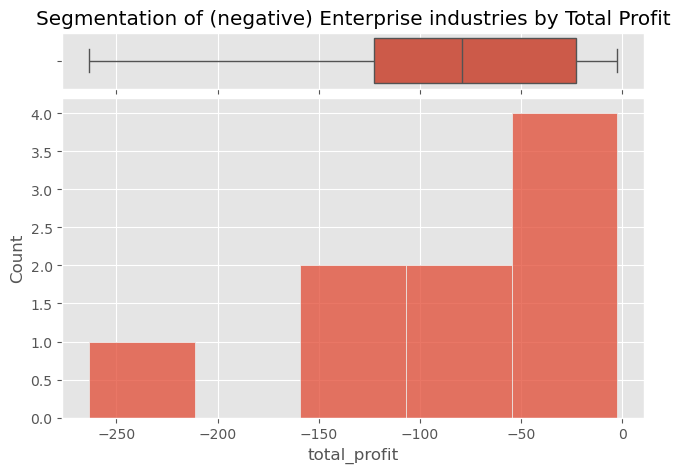

0.0000   -263.5990
0.2500   -122.6504
0.5000    -79.4642
0.7500    -22.9080
1.0000     -2.5648
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -122.65 in profit
- 3 (Significant) : Loses between -122.65 and -79.46 in profit
- 2 (Negative) : Loses between -79.46 and -22.91 in profit
- 1 (Marginal) : Loses less than -22.91 in profit


In [56]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [57]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
26,APJ,Enterprise,Manufacturing,-263.5990,0.2667,4
40,EMEA,Enterprise,Communications,-124.4310,0.3000,4
4,AMER,Enterprise,Healthcare,-122.6504,0.2000,4
5,AMER,Enterprise,Manufacturing,-82.8766,0.1667,3
27,APJ,Enterprise,Transportation,-79.4642,0.3000,3
8,AMER,Enterprise,Transportation,-35.5136,0.3000,2
2,AMER,Enterprise,Energy,-22.9080,0.1000,2
25,APJ,Enterprise,Finance,-9.3060,0.2500,1
23,APJ,Enterprise,Consumer Products,-2.5648,0.3000,1


In [58]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_negative_profit_metrics[enterprise_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are Enterprise industries contributing to substantial losses and are considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Manufacturing in APJ, Communications in EMEA, Healthcare in AMER are Enterprise industries contributing to substantial losses and are considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Manufacturing in AMER, Transportation in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Transportation in AMER, Energy in AMER, Finance in APJ, Consumer Products in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [64]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Enterprise segment
total_metrics_Enterprise = prod2_2023.query("Segment == 'Enterprise'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter <------------change to compare with total share 
prod2_2023_industry_region_Enterprise = prod2_2023.query("Segment == 'Enterprise' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
Enterprise_account = prod2_2023.query("Segment == 'Enterprise'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod2_2023_percents_Enterprise = Enterprise_account.merge(prod2_2023_industry_region_Enterprise, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod2_2023_percents_Enterprise = prod2_2023_percents_Enterprise.dropna()

# Calculate percentages
prod2_2023_percents_Enterprise['% Account'] = prod2_2023_percents_Enterprise['account'] / Enterprise_account['account'].sum() * 100
prod2_2023_percents_Enterprise['% Quantity'] = prod2_2023_percents_Enterprise['Quantity'] / total_metrics_Enterprise['Quantity'] * 100
prod2_2023_percents_Enterprise['% Sales'] = prod2_2023_percents_Enterprise['Sales'] / total_metrics_Enterprise['Sales'] * 100
prod2_2023_percents_Enterprise['% Net Revenue'] = prod2_2023_percents_Enterprise['discounted_sales'] / total_metrics_Enterprise['discounted_sales'] * 100

# Filter data for specific industries and regions 
specific_industries = ['Manufacturing', 'Communications', 'Healthcare']
specific_regions = ['APJ', 'EMEA', 'AMER']
filtered_Enterprise = prod2_2023_percents_Enterprise[(prod2_2023_percents_Enterprise['Industry'].isin(specific_industries)) & 
                                       (prod2_2023_percents_Enterprise['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_Enterprise.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [65]:
# to see detailed Discounted orders for the Enterprise "Severe" Category
filtered_Enterprise2 = prod2_2023[(prod2_2023['Industry'].isin(specific_industries)) & (prod2_2023['Region'].isin(specific_regions)) & (prod2_2023['net_profit'] < 0) ]
filtered_Enterprise3 = filtered_Enterprise2[filtered_Enterprise2['Segment'] == 'Enterprise']
grouped_data = filtered_Enterprise3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [66]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,AMER,0.3000,1
1,Communications,EMEA,0.3000,1
2,Healthcare,AMER,0.2000,2
3,Manufacturing,AMER,0.2000,1
4,Manufacturing,AMER,0.3000,1
5,Manufacturing,APJ,0.3000,2


In [67]:
prod2_2023[(prod2_2023['Region'] == 'APJ') & (prod2_2023['Industry'] == 'Manufacturing') & (prod2_2023['Segment'] == 'Enterprise') & (prod2_2023['net_profit'] < 0)]

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month
1446,APJ-2023-102337,2023-06-14,20230614,1039,BMW,Enterprise,Manufacturing,APJ,ANZ,Australia,Sydney,FinanceHub,470.3020,7,0.3000,-87.3418,141.0906,67.1860,53.7488,-12.4774,-18.5714,329.2114,6,2023,2023-06
5157,APJ-2023-163006,2023-07-01,20230701,1041,General Motors,Enterprise,Manufacturing,APJ,ANZ,Australia,Sydney,FinanceHub,569.0580,3,0.3000,-178.8468,170.7174,189.6860,-8.1294,-59.6156,-31.4286,398.3406,7,2023,2023-07


Discounting is also a problem for the Enterprise segment. Both orders from the Enterprise Manufacturing industry in the APJ region and have a 30% discount, contributing to the significant losses. The net profits for these orders are -87.3418 and -178.8468, respectively, highlighting the impact of heavy discounting on profitability. 

Beyond the need for discounts, here are additional factors to consider beyond an EDA approach:
- Value Perception: Customers may not perceive the software's value to be equivalent to its cost, making discounts necessary to attract them.
- Competitive Market: There may be many similar SaaS solutions available, causing price competition that forces discounting to remain attractive.
- Customer Acquisition: High discounts might be used as an incentive to attract new customers, especially in a crowded market or during initial product launch phases.
- Retention Challenges: If customers are not renewing subscriptions without discounts, it might suggest that the product isn't delivering ongoing value.
- Feature Set: The product might lack key features or functionalities that competitors offer, making it less appealing at full price.
- Market Penetration: Discounts might be used to penetrate new markets or segments where customers are unfamiliar with the product or brand.
- Economic Conditions: Broader economic downturns can affect customer budgets, making discounts necessary to maintain sales volumes.

**Key findings:**
1. EMEA has the highest sales and net profit, especially in September and December, but needs better discount management to avoid negative profits and stabilize sales. Discounts result in negative profits in January, February, May, and August.
2. AMER has strong sales and profits in September and December, with dips in March and April. Discounts often lead to negative profits, especially in April and November.
3. APJ has the lowest sales and net profit among the regions, with peaks in March, June, and November. Discounts severely impact profits, especially in January, February, May, July, September, October, and December.
4. In the SMB segment, the Retail industry in all regions are best performing; along with Healthcare in AMER and Finance in EMEA. Meanwhile, Manufacturing in EMEA, Healthcare in APJ, and Energy in APJ lose money and are high-risk. Significant shares but minimal contribution from these industries suggest revising discount strategies. Balancing revenue and profitability requires smart measures and considering operational costs and marketing efforts.
5. In the Strategic segment, Finance in EMEA and APJ; along with Healthcare in AMER and Energy in APJ excel. However, Energy in AMER and Manufacturing in EMEA suffer severe losses. Rethinking discount strategies is crucial for balancing revenue and profitability.
6. In the Enterprise segment, focus on Finance in AMER, Healthcare in EMEA, Energy in APJ, and Transportation in EMEA for strategic growth. Address significant losses in Manufacturing in APJ, Communications in EMEA, Healthcare in AMER. Heavy discounting is the problem. Revise discount strategies to balance revenue and profitability effectively. Measure all costs to ensure overall profitability.